## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [1]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [2]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Wed Apr 13 21:49:37 2022 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [3]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


In [4]:
a=PDSinfo[PDSinfo['Subject']==44].index.tolist()
e=PDSinfo[PDSinfo['Subject']==44].index.tolist()[2]
print(a)
print(e)

[516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527]
518


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## For Every Subject

## Errors in function of angles

In [5]:
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.cos(angulox)
    cosz=np.cos(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])+Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])+Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)

# Correlation between COPX and Angle x

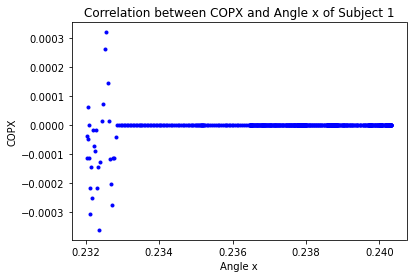

[[ 1. nan]
 [nan nan]]


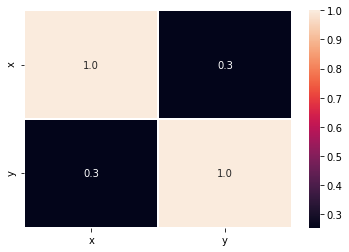

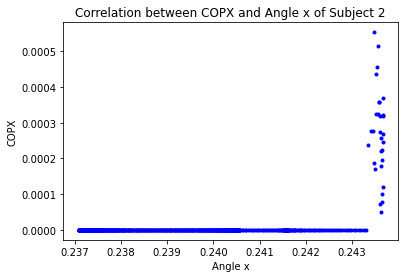

[[ 1. nan]
 [nan nan]]


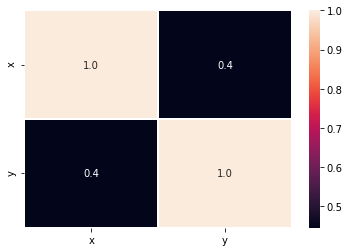

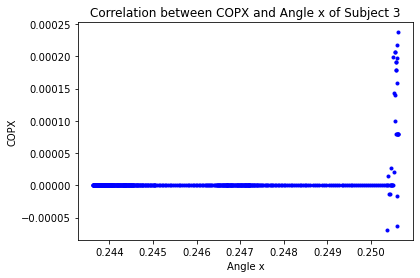

[[ 1. nan]
 [nan nan]]


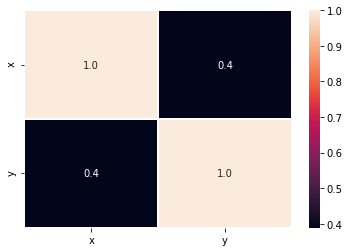

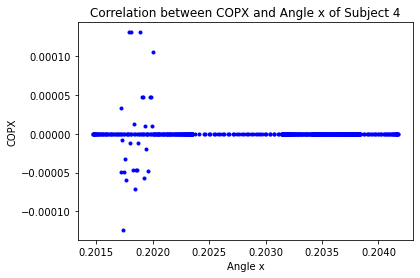

[[ 1. nan]
 [nan nan]]


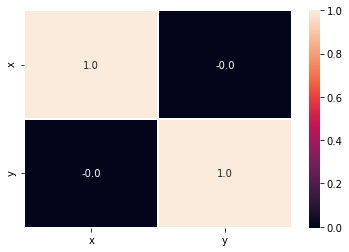

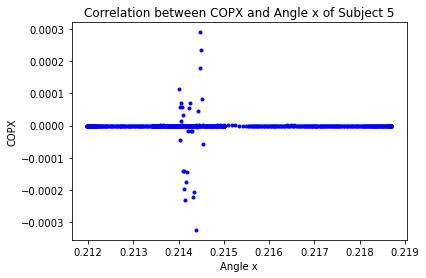

[[ 1. nan]
 [nan nan]]


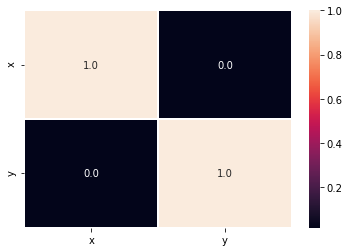

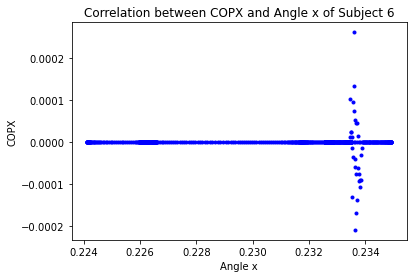

[[ 1. nan]
 [nan nan]]


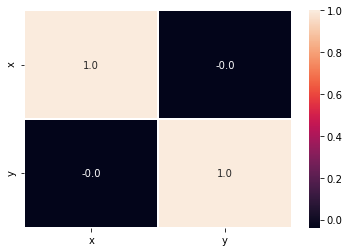

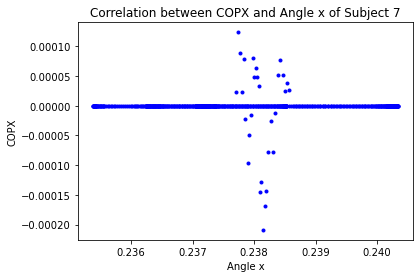

[[ 1. nan]
 [nan nan]]


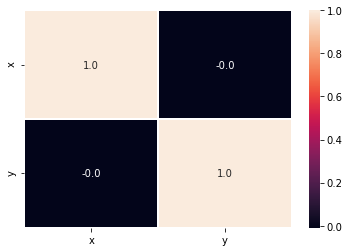

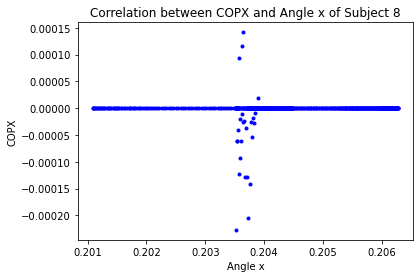

[[ 1. nan]
 [nan nan]]


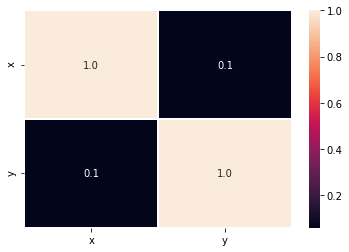

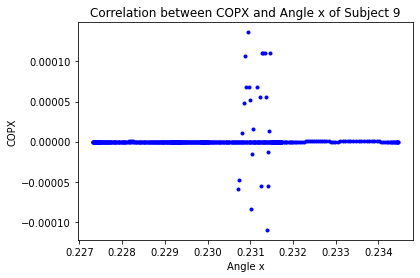

[[ 1. nan]
 [nan nan]]


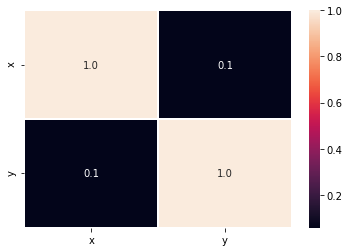

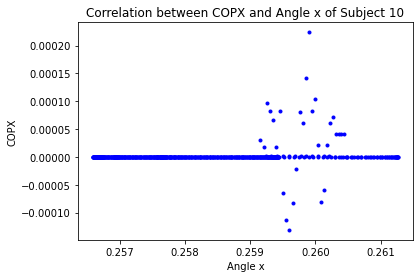

[[ 1. nan]
 [nan nan]]


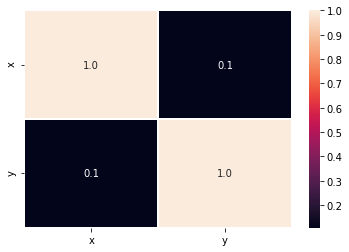

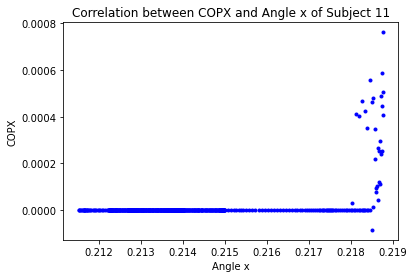

[[ 1. nan]
 [nan nan]]


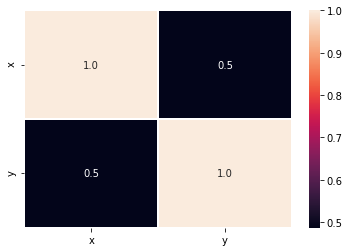

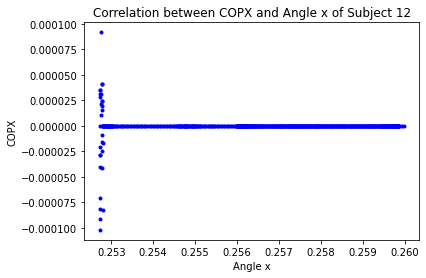

[[ 1. nan]
 [nan nan]]


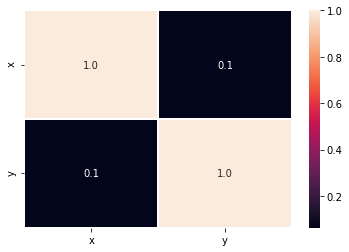

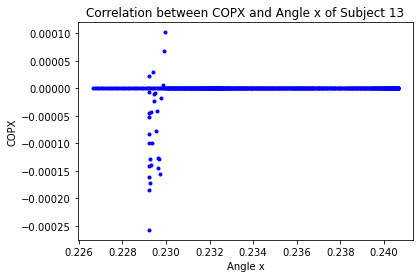

[[ 1. nan]
 [nan nan]]


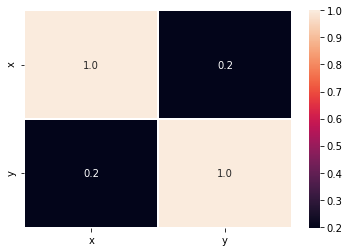

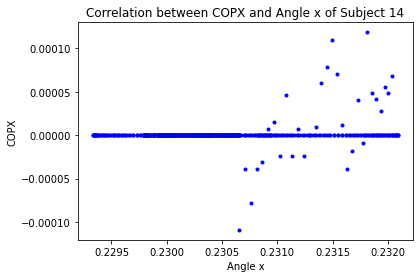

[[ 1. nan]
 [nan nan]]


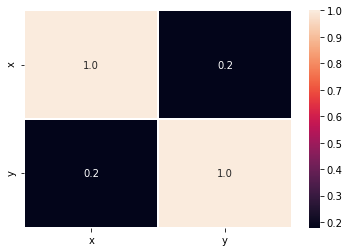

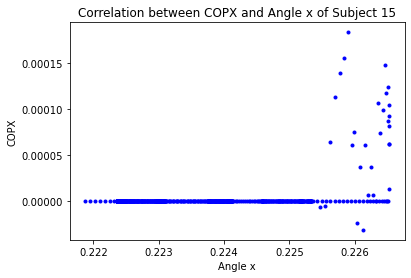

[[ 1. nan]
 [nan nan]]


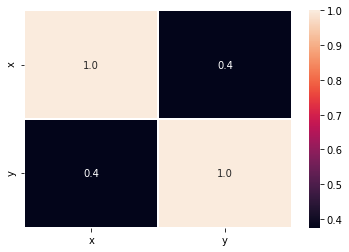

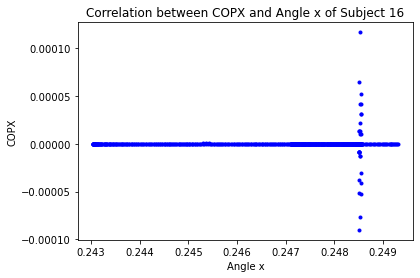

[[ 1. nan]
 [nan nan]]


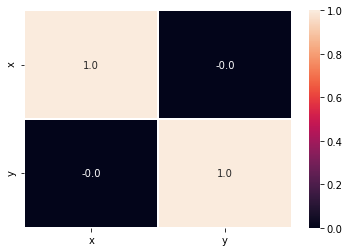

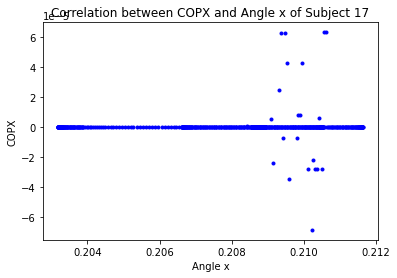

[[ 1. nan]
 [nan nan]]


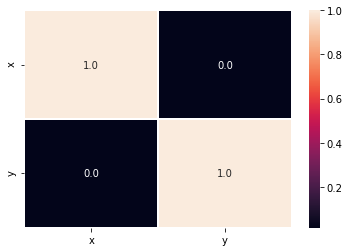

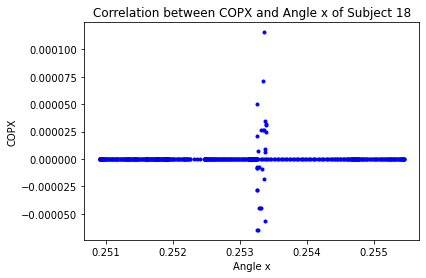

[[ 1. nan]
 [nan nan]]


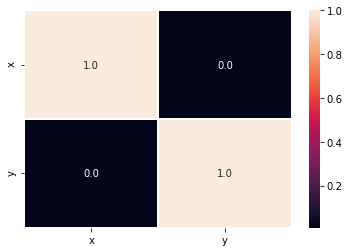

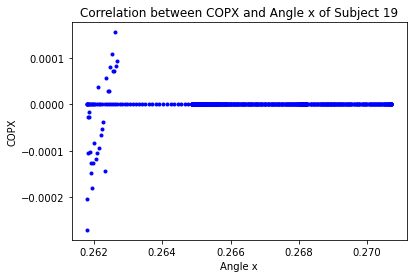

[[ 1. nan]
 [nan nan]]


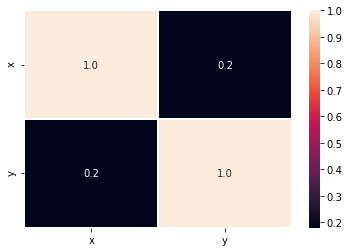

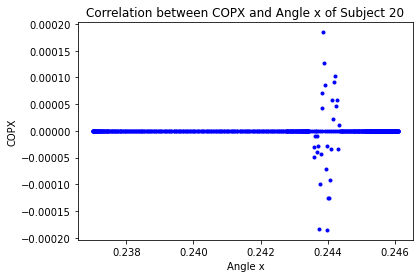

[[ 1. nan]
 [nan nan]]


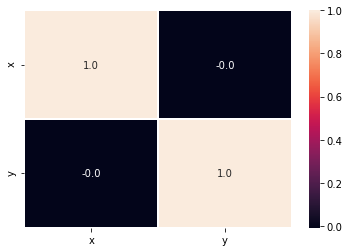

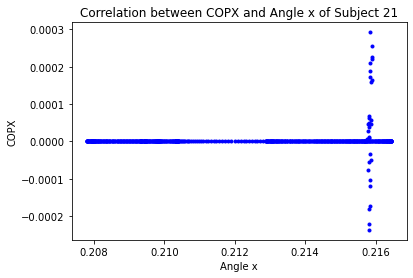

[[ 1. nan]
 [nan nan]]


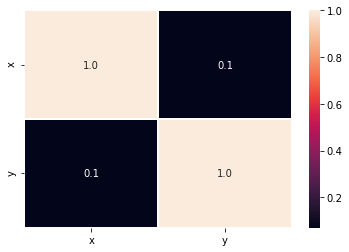

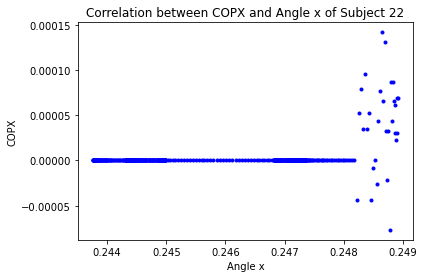

[[ 1. nan]
 [nan nan]]


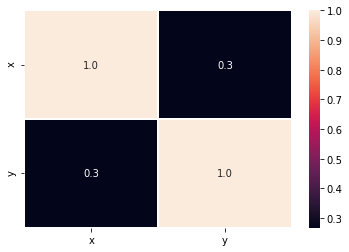

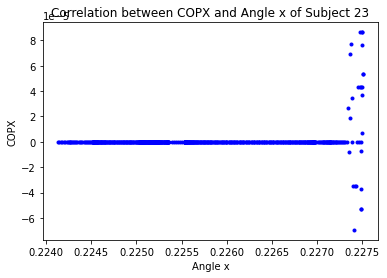

[[ 1. nan]
 [nan nan]]


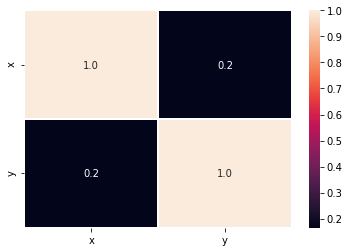

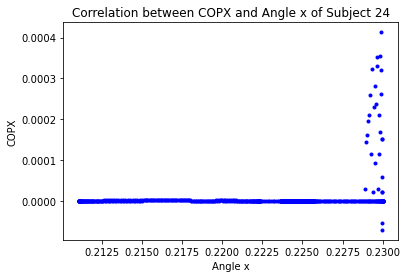

[[ 1. nan]
 [nan nan]]


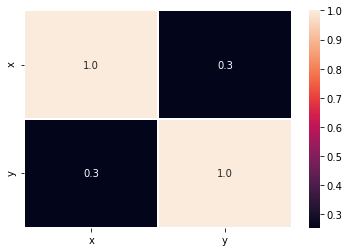

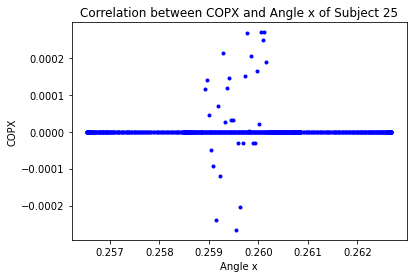

[[ 1. nan]
 [nan nan]]


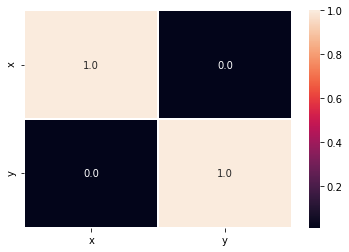

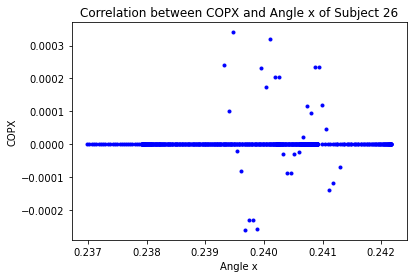

[[ 1. nan]
 [nan nan]]


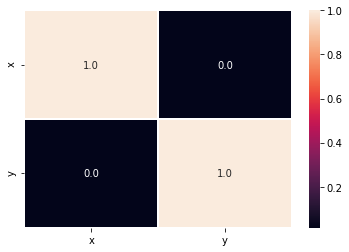

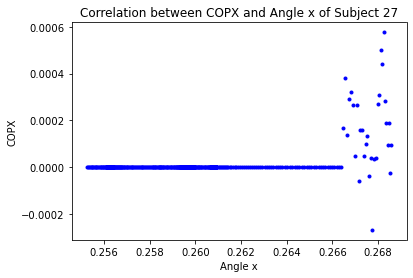

[[ 1. nan]
 [nan nan]]


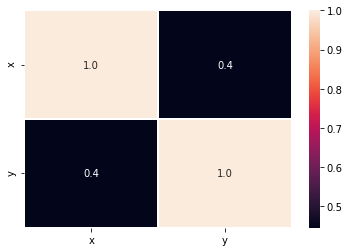

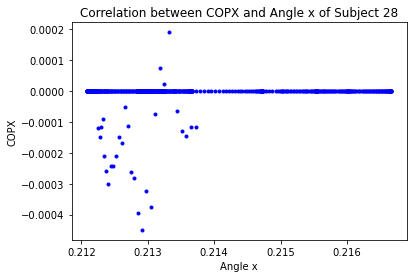

[[ 1. nan]
 [nan nan]]


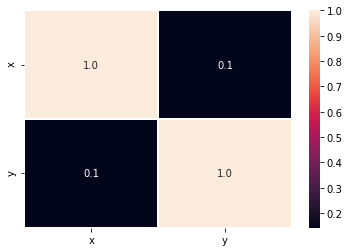

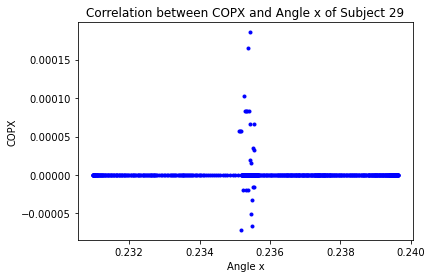

[[ 1. nan]
 [nan nan]]


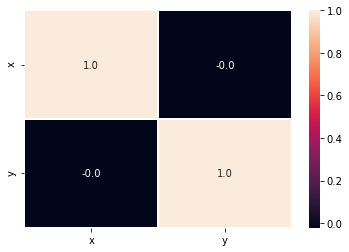

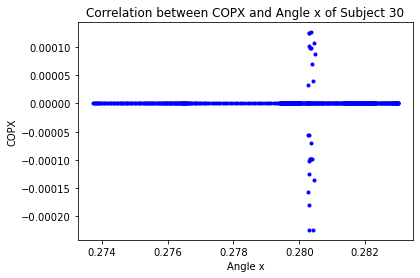

[[ 1. nan]
 [nan nan]]


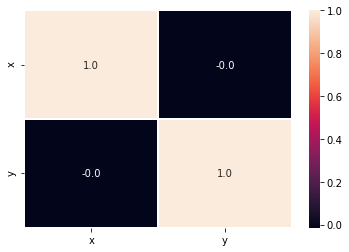

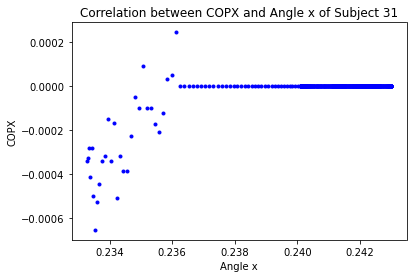

[[ 1. nan]
 [nan nan]]


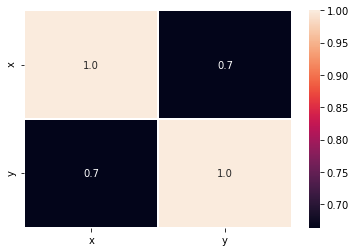

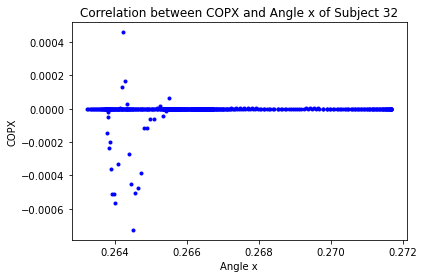

[[ 1. nan]
 [nan nan]]


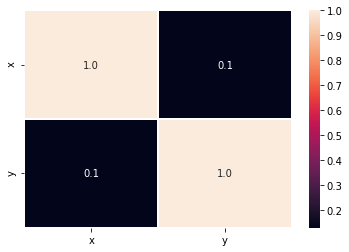

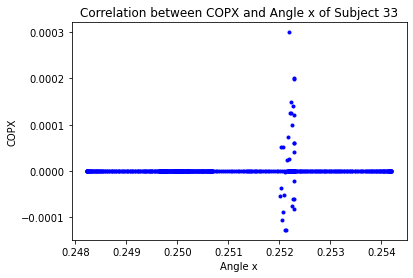

[[ 1. nan]
 [nan nan]]


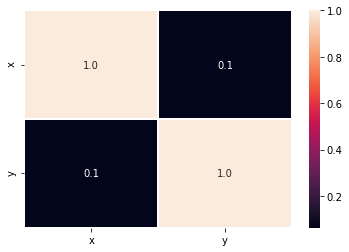

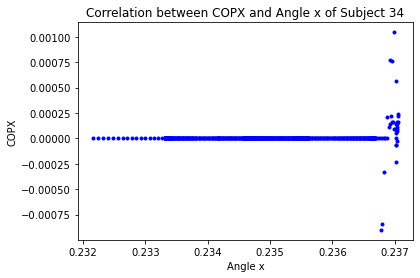

[[ 1. nan]
 [nan nan]]


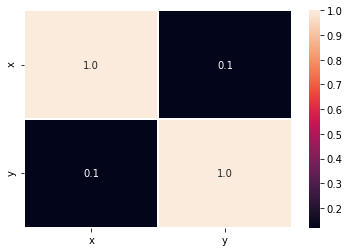

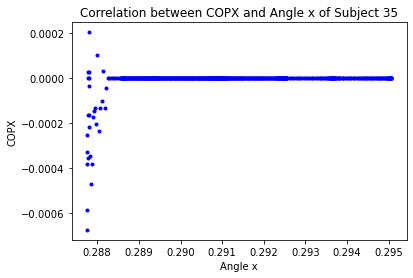

[[ 1. nan]
 [nan nan]]


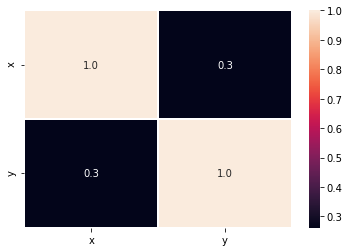

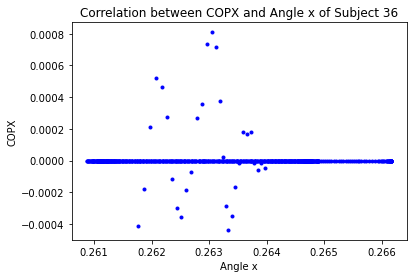

[[ 1. nan]
 [nan nan]]


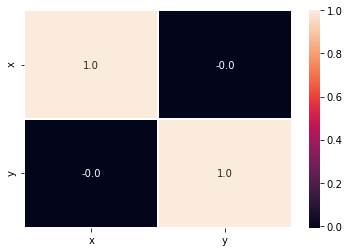

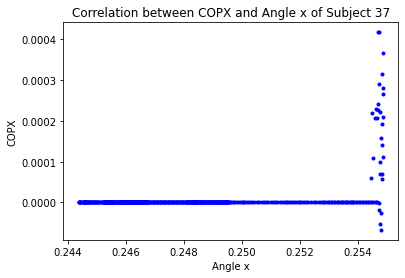

[[ 1. nan]
 [nan nan]]


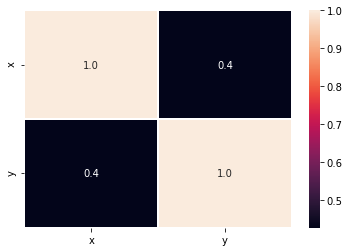

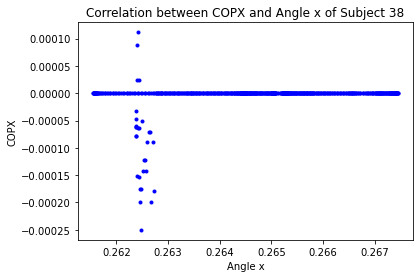

[[ 1. nan]
 [nan nan]]


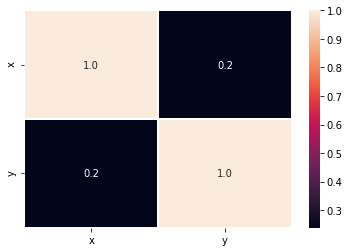

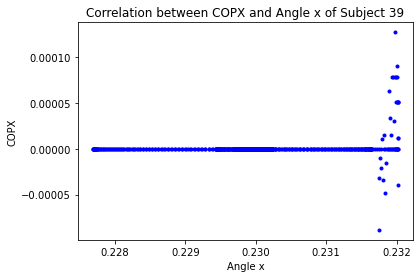

[[ 1. nan]
 [nan nan]]


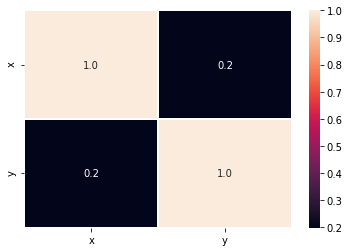

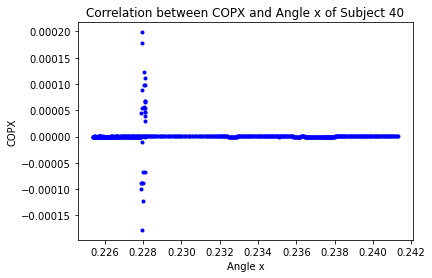

[[ 1. nan]
 [nan nan]]


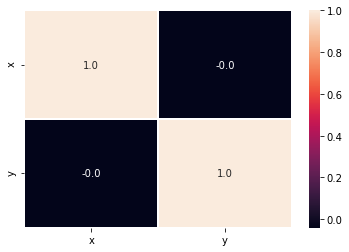

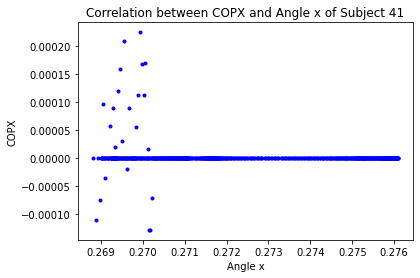

[[ 1. nan]
 [nan nan]]


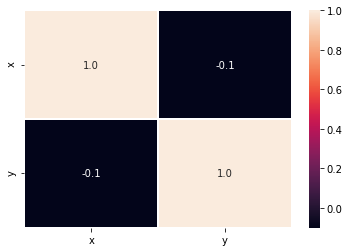

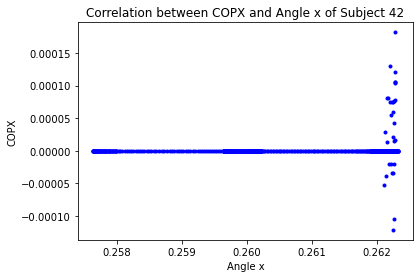

[[ 1. nan]
 [nan nan]]


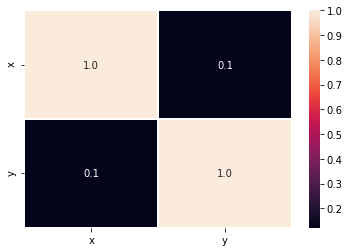

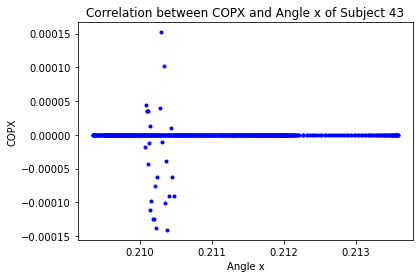

[[ 1. nan]
 [nan nan]]


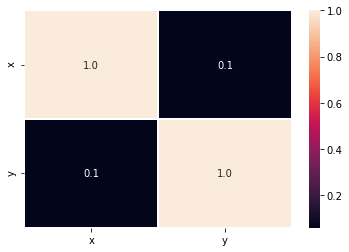

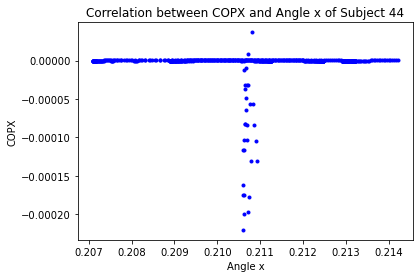

[[ 1. nan]
 [nan nan]]


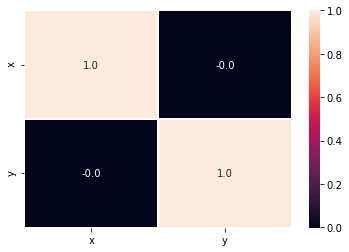

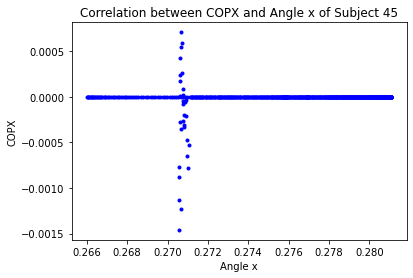

[[ 1. nan]
 [nan nan]]


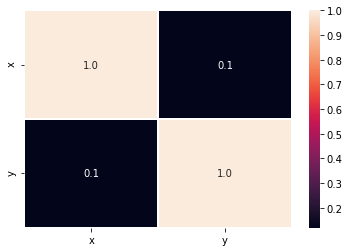

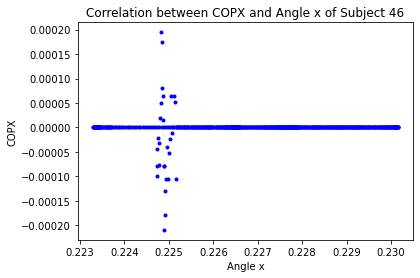

[[ 1. nan]
 [nan nan]]


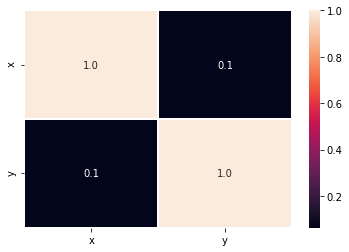

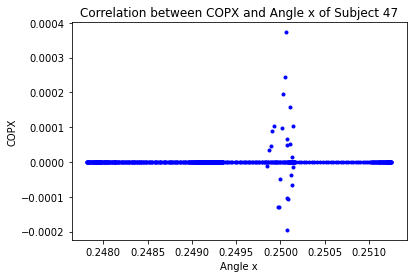

[[ 1. nan]
 [nan nan]]


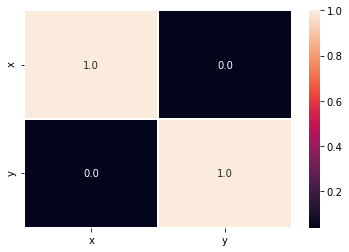

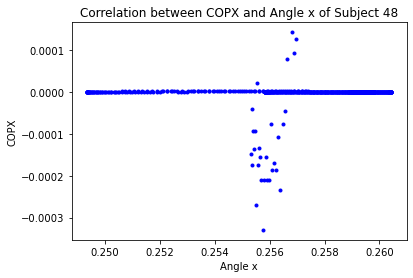

[[ 1. nan]
 [nan nan]]


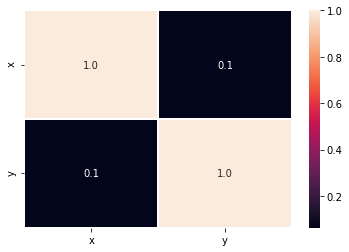

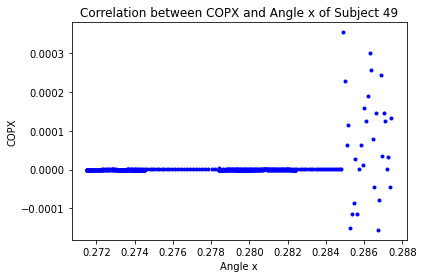

[[ 1. nan]
 [nan nan]]


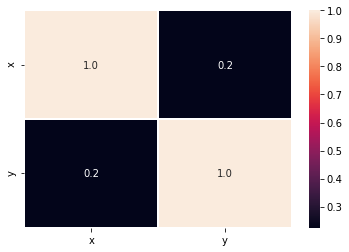

In [6]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':matrizangx,
         'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    #ax=sns.lmplot(x=matrizangx, y=errorx, data= df)
    #ax
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Angle x")
    plt.ylabel("COPX")
    plt.title("Correlation between COPX and Angle x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(matrizangx,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':matrizangx,
          'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

# Correlation between COPX and First Derivative x

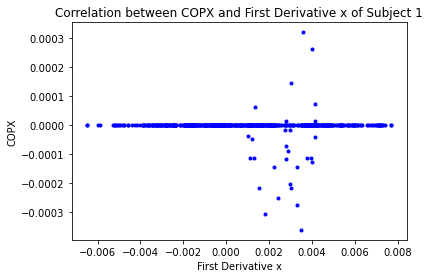

[[ 1. nan]
 [nan nan]]


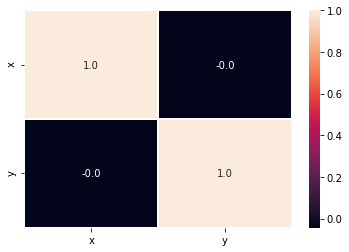

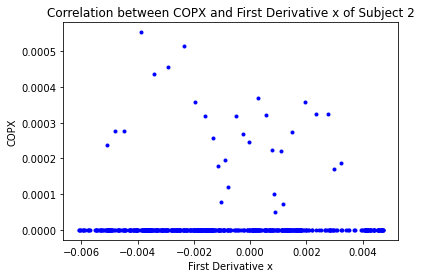

[[ 1. nan]
 [nan nan]]


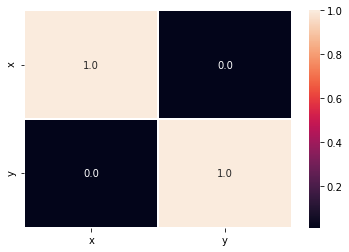

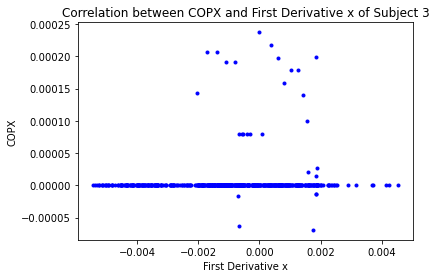

[[ 1. nan]
 [nan nan]]


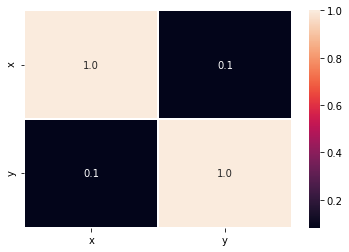

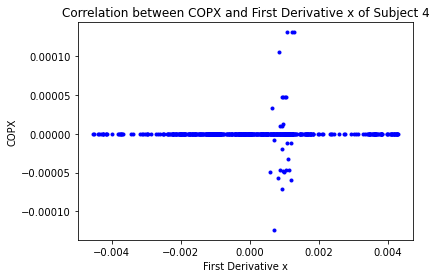

[[ 1. nan]
 [nan nan]]


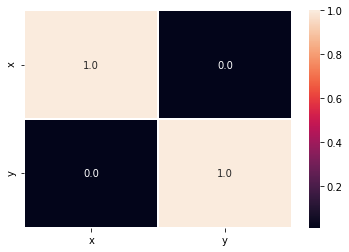

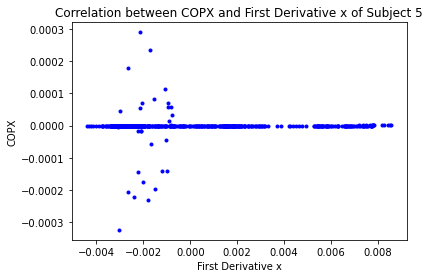

[[ 1. nan]
 [nan nan]]


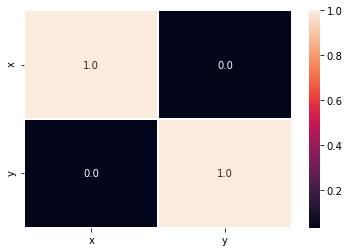

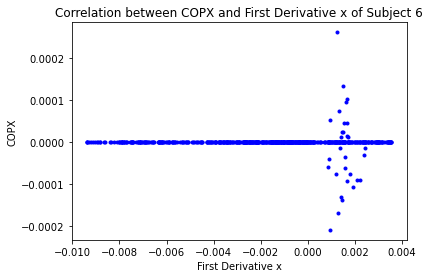

[[ 1. nan]
 [nan nan]]


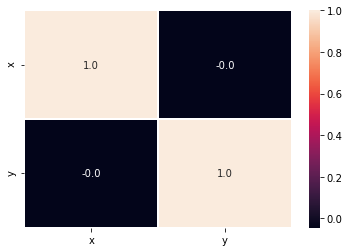

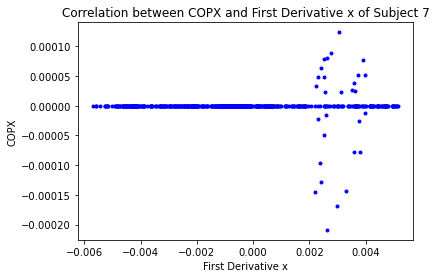

[[ 1. nan]
 [nan nan]]


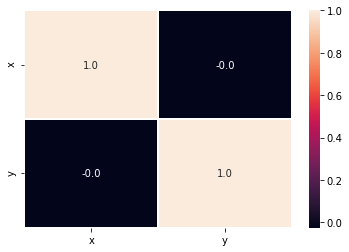

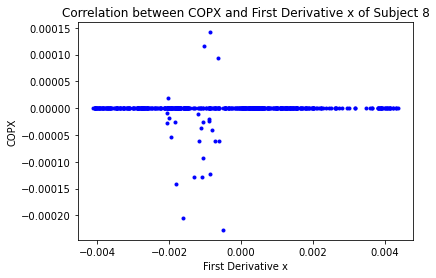

[[ 1. nan]
 [nan nan]]


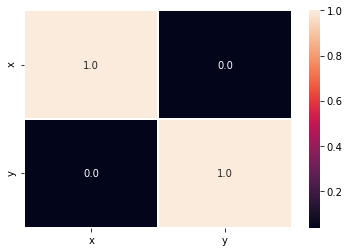

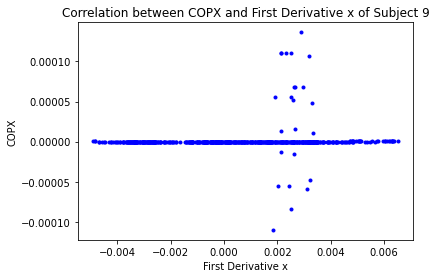

[[ 1. nan]
 [nan nan]]


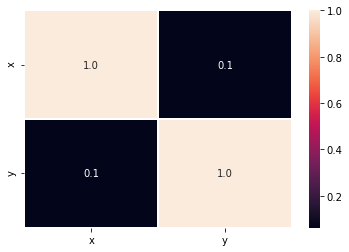

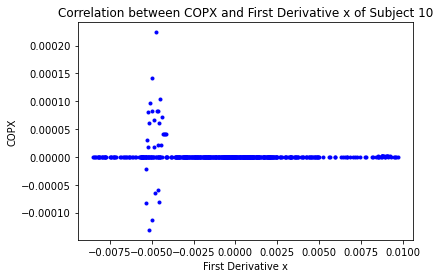

[[ 1. nan]
 [nan nan]]


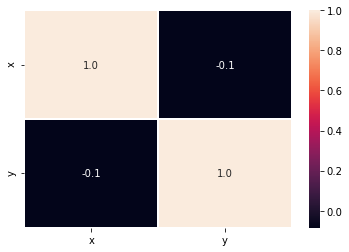

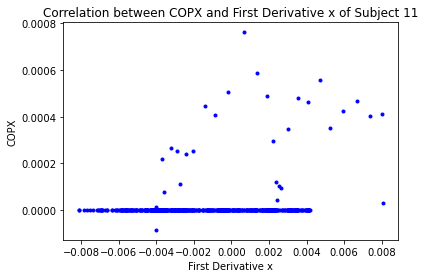

[[ 1. nan]
 [nan nan]]


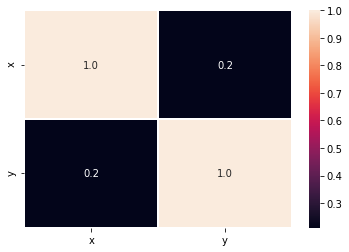

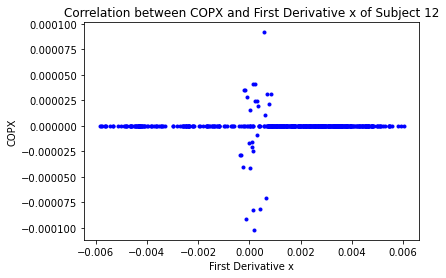

[[ 1. nan]
 [nan nan]]


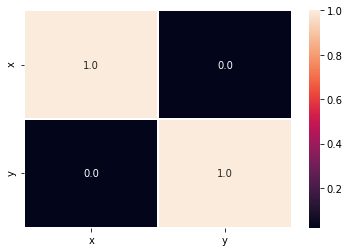

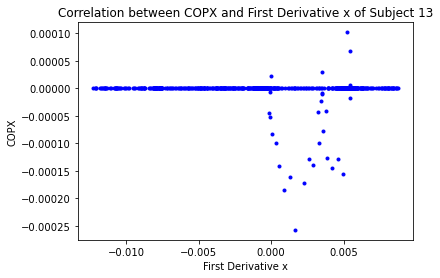

[[ 1. nan]
 [nan nan]]


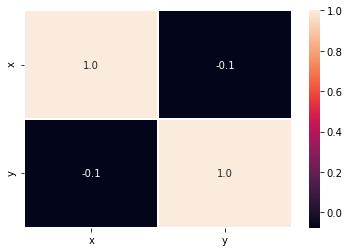

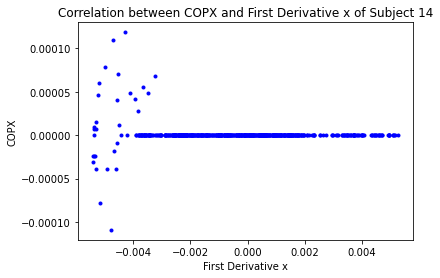

[[ 1. nan]
 [nan nan]]


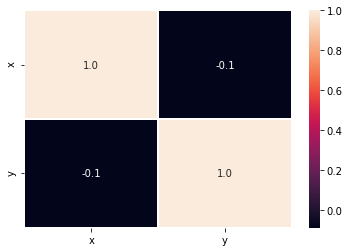

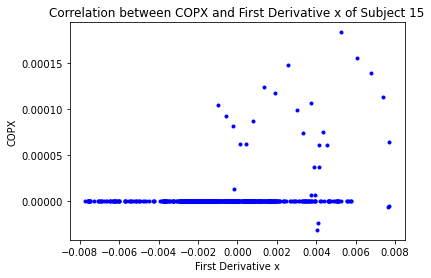

[[ 1. nan]
 [nan nan]]


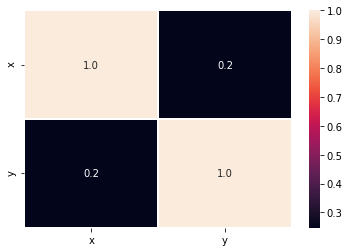

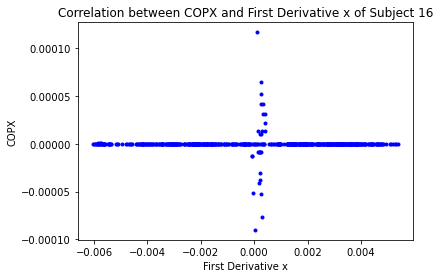

[[ 1. nan]
 [nan nan]]


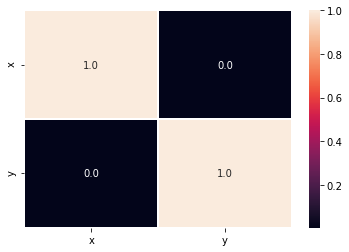

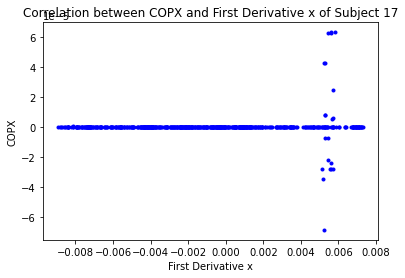

[[ 1. nan]
 [nan nan]]


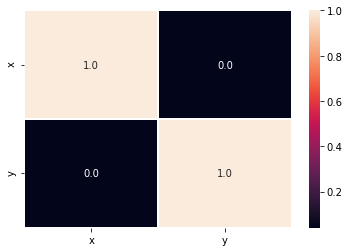

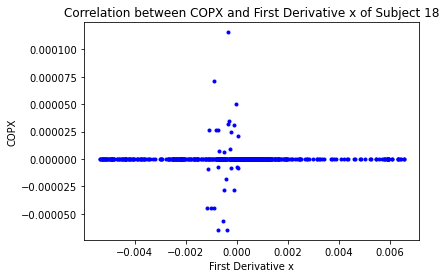

[[ 1. nan]
 [nan nan]]


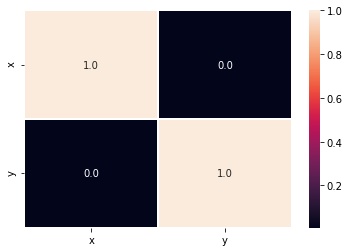

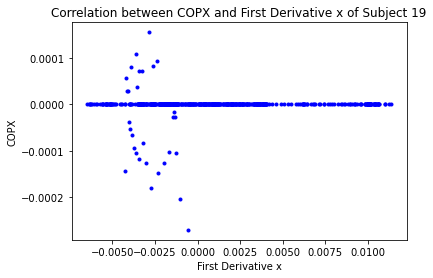

[[ 1. nan]
 [nan nan]]


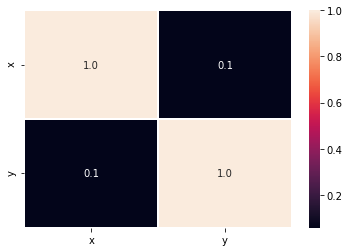

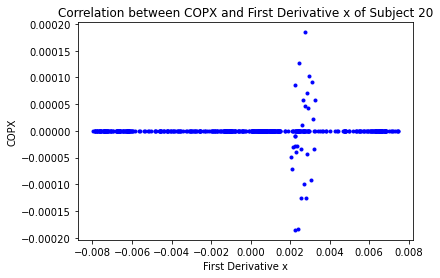

[[ 1. nan]
 [nan nan]]


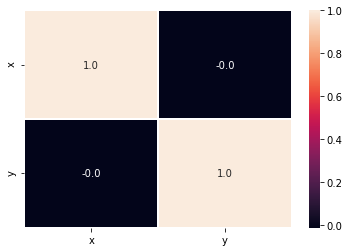

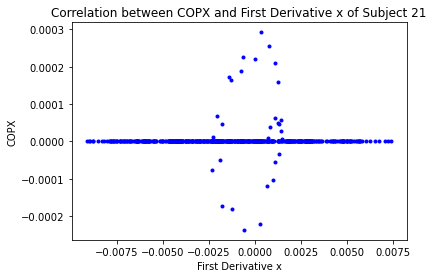

[[ 1. nan]
 [nan nan]]


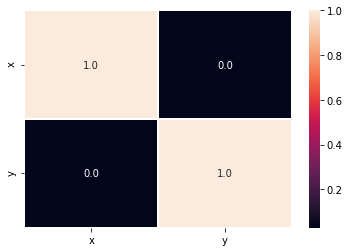

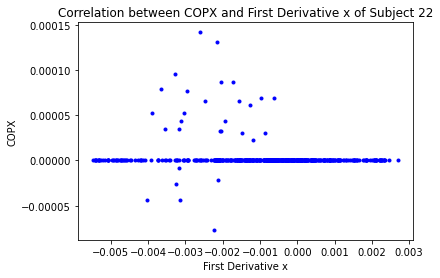

[[ 1. nan]
 [nan nan]]


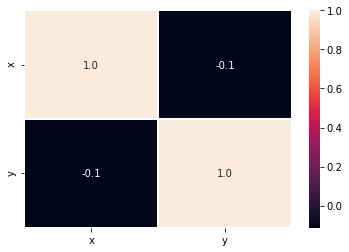

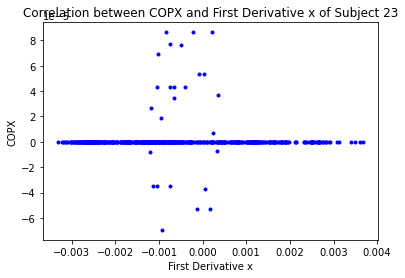

[[ 1. nan]
 [nan nan]]


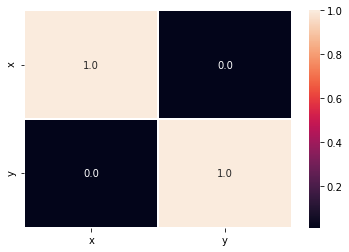

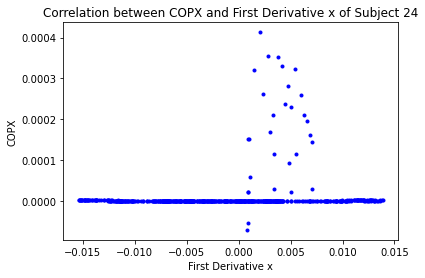

[[ 1. nan]
 [nan nan]]


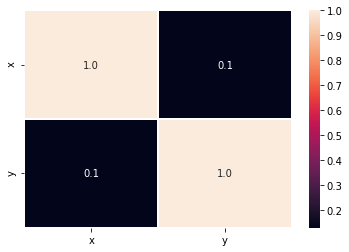

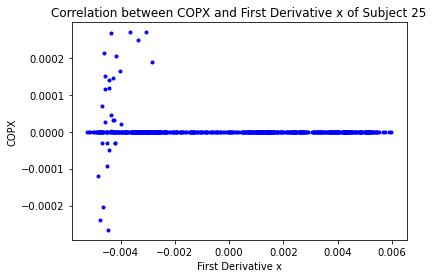

[[ 1. nan]
 [nan nan]]


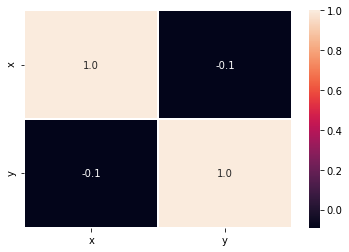

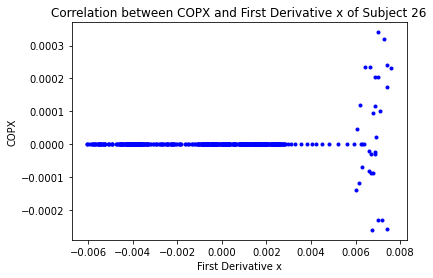

[[ 1. nan]
 [nan nan]]


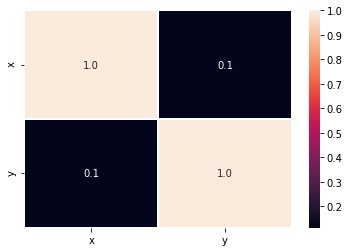

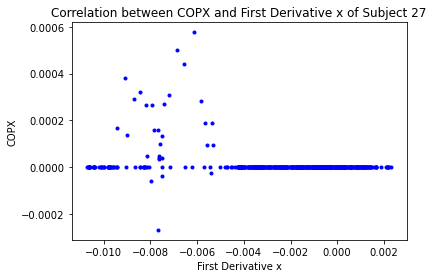

[[ 1. nan]
 [nan nan]]


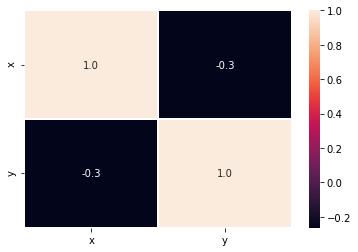

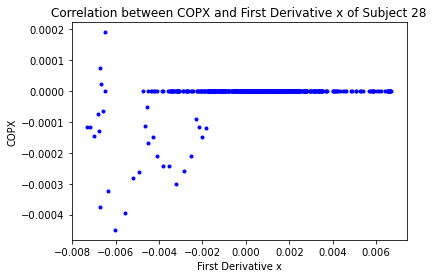

[[ 1. nan]
 [nan nan]]


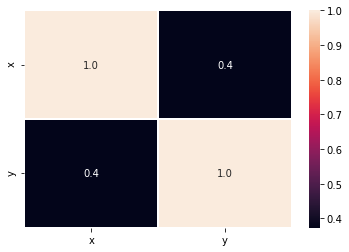

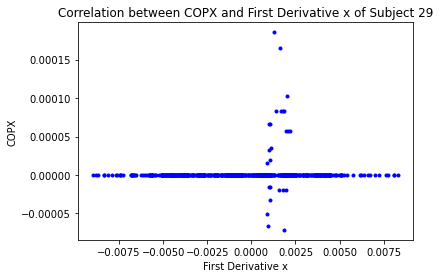

[[ 1. nan]
 [nan nan]]


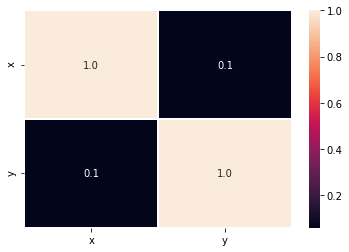

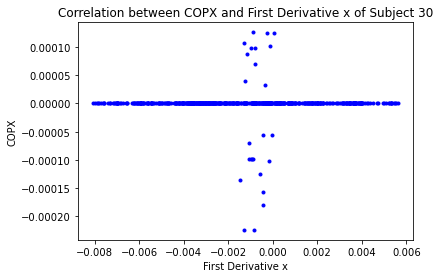

[[ 1. nan]
 [nan nan]]


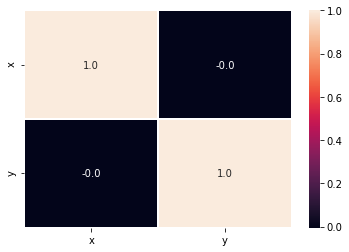

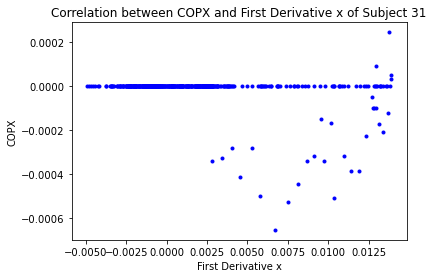

[[ 1. nan]
 [nan nan]]


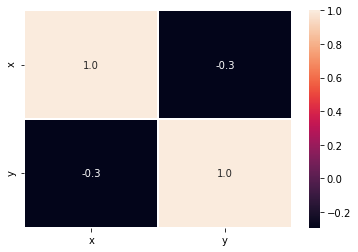

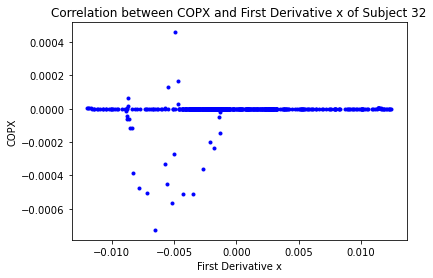

[[ 1. nan]
 [nan nan]]


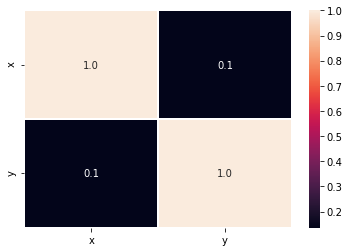

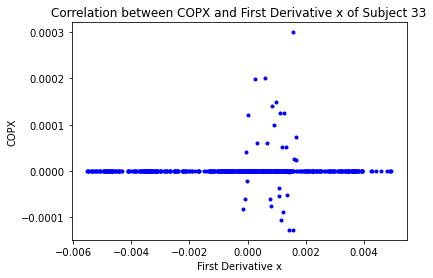

[[ 1. nan]
 [nan nan]]


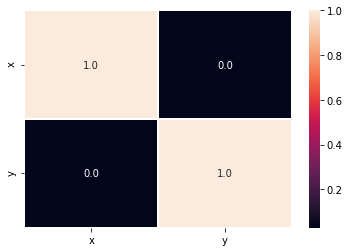

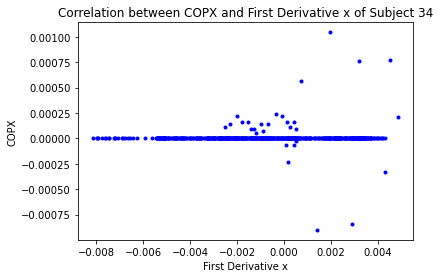

[[ 1. nan]
 [nan nan]]


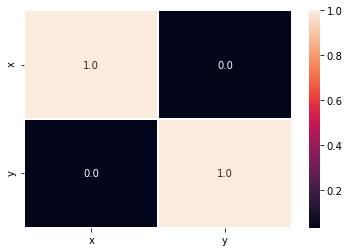

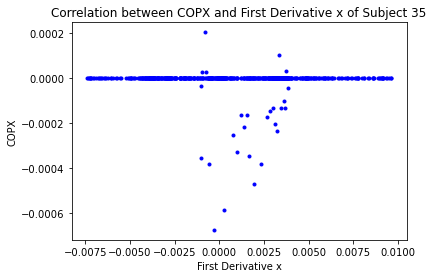

[[ 1. nan]
 [nan nan]]


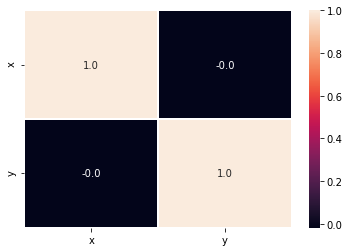

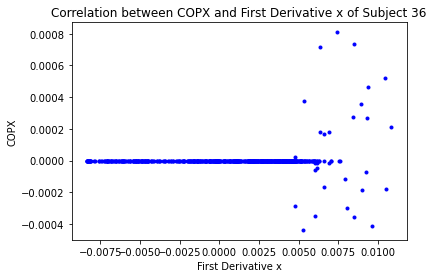

[[ 1. nan]
 [nan nan]]


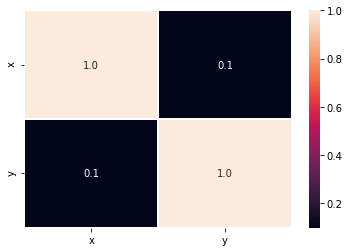

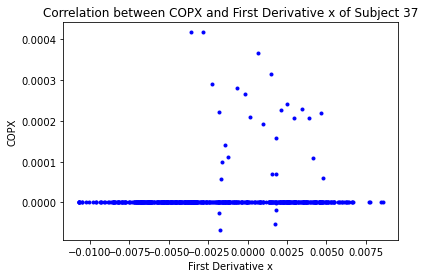

[[ 1. nan]
 [nan nan]]


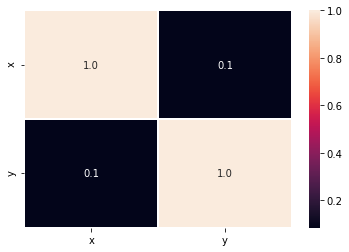

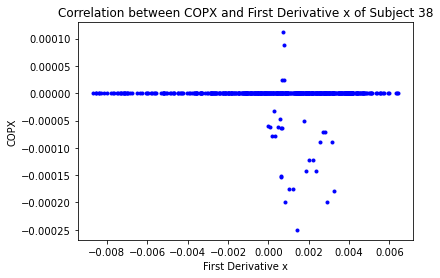

[[ 1. nan]
 [nan nan]]


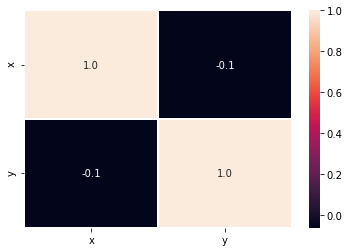

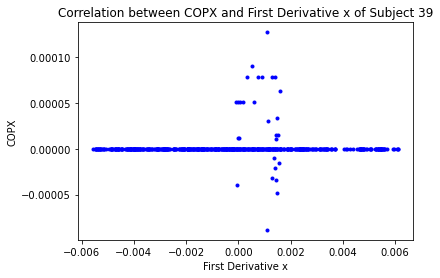

[[ 1. nan]
 [nan nan]]


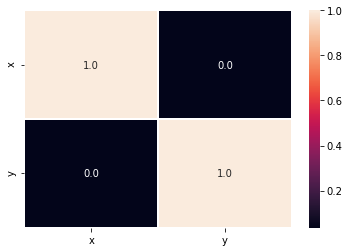

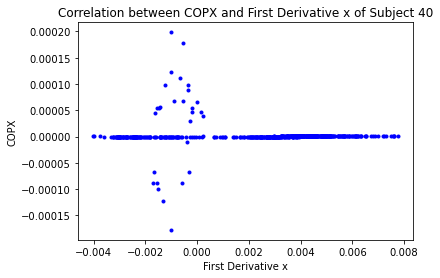

[[ 1. nan]
 [nan nan]]


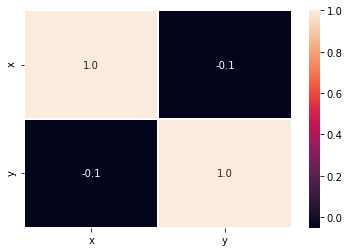

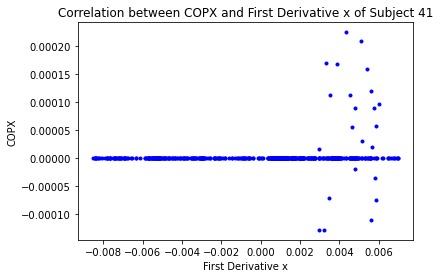

[[ 1. nan]
 [nan nan]]


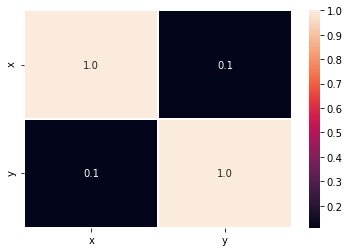

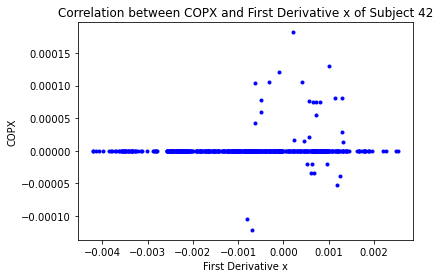

[[ 1. nan]
 [nan nan]]


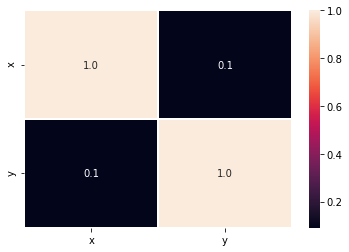

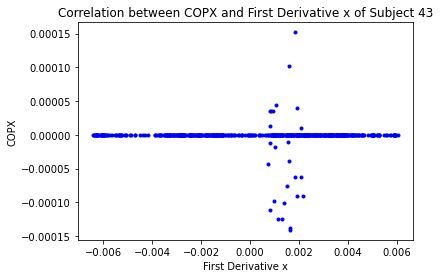

[[ 1. nan]
 [nan nan]]


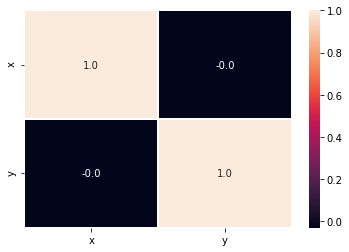

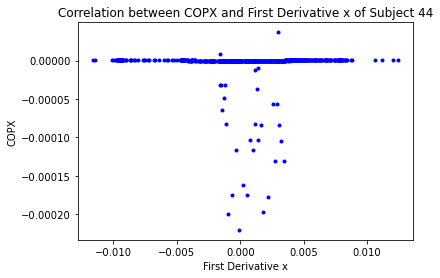

[[ 1. nan]
 [nan nan]]


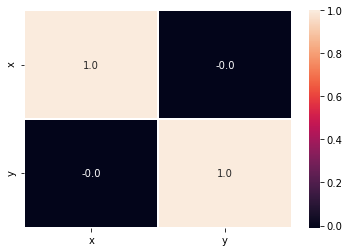

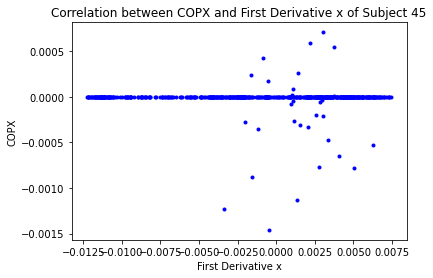

[[ 1. nan]
 [nan nan]]


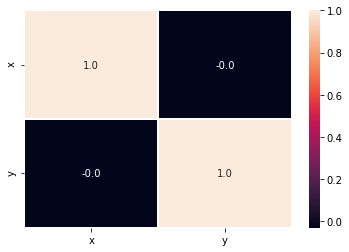

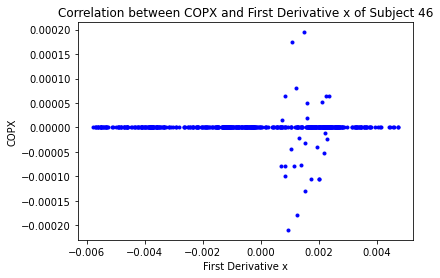

[[ 1. nan]
 [nan nan]]


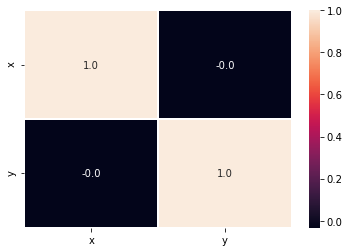

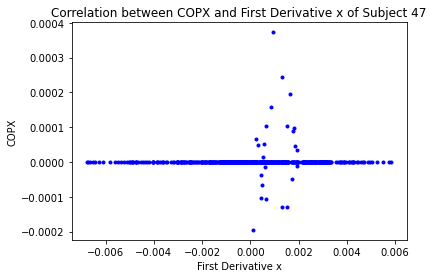

[[ 1. nan]
 [nan nan]]


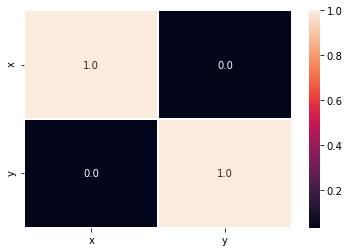

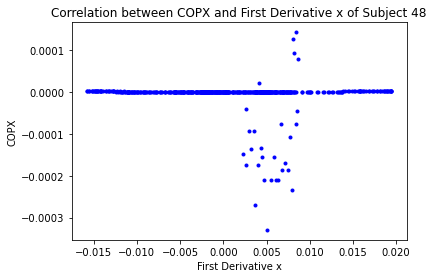

[[ 1. nan]
 [nan nan]]


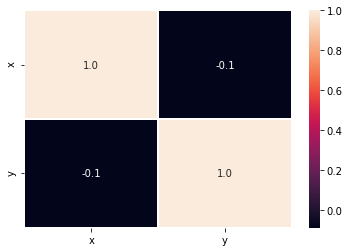

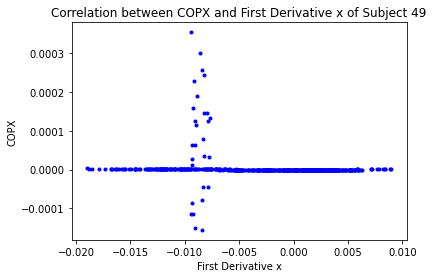

[[ 1. nan]
 [nan nan]]


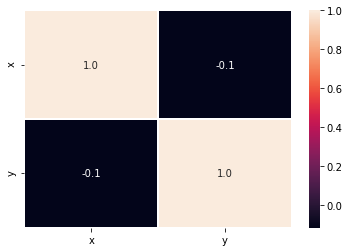

In [18]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d1x,
         'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("First Derivative x")
    plt.ylabel("COPX")
    plt.title("Correlation between COPX and First Derivative x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d1x,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':d1x,
          'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

# Correlation between COPX and Second Derivative x

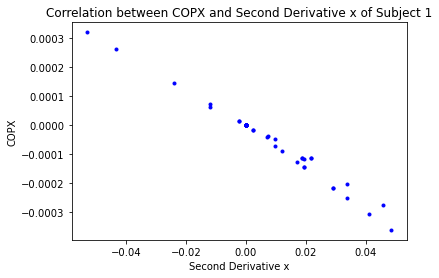

[[ 1. nan]
 [nan nan]]


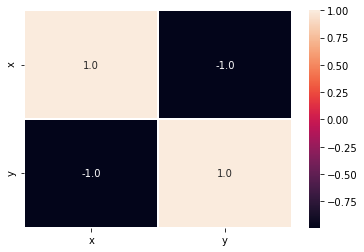

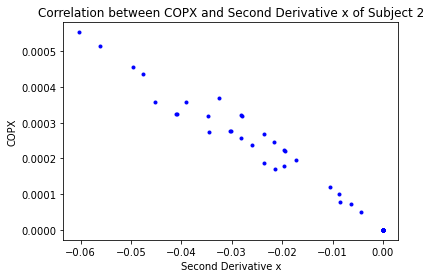

[[ 1. nan]
 [nan nan]]


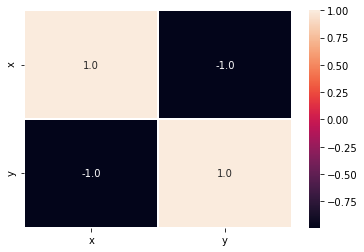

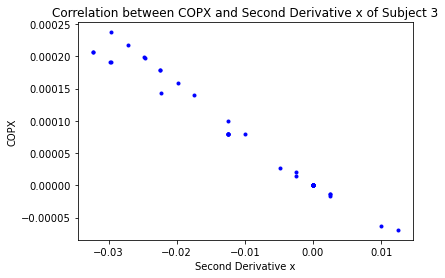

[[ 1. nan]
 [nan nan]]


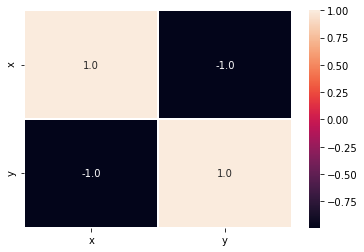

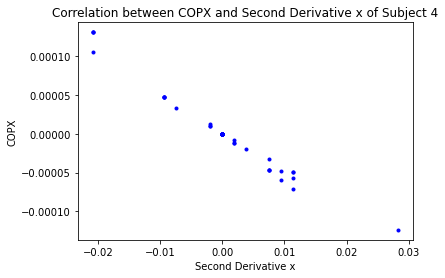

[[ 1. nan]
 [nan nan]]


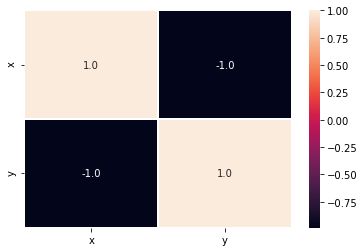

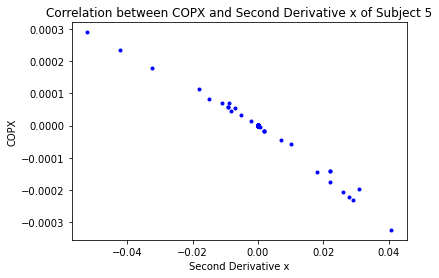

[[ 1. nan]
 [nan nan]]


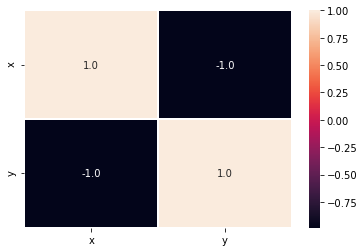

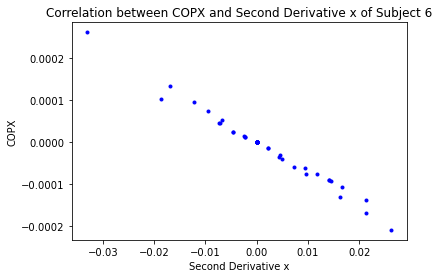

[[ 1. nan]
 [nan nan]]


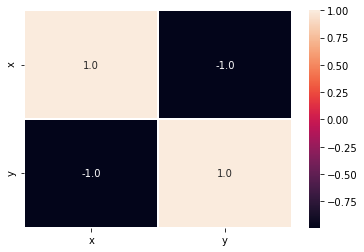

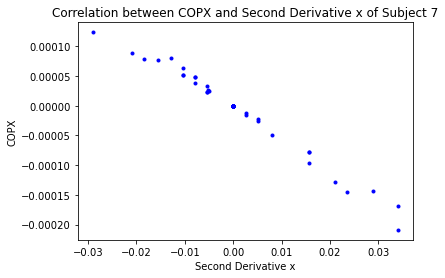

[[ 1. nan]
 [nan nan]]


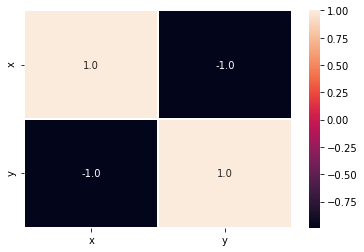

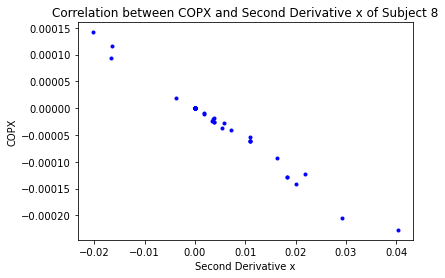

[[ 1. nan]
 [nan nan]]


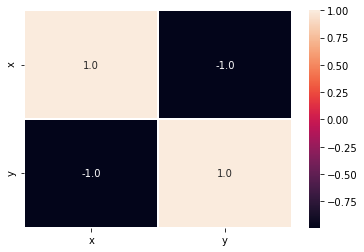

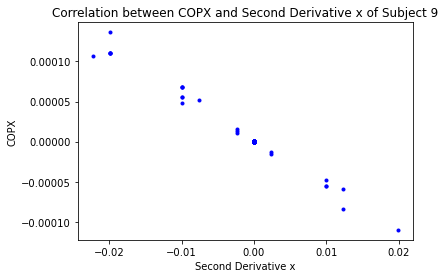

[[ 1. nan]
 [nan nan]]


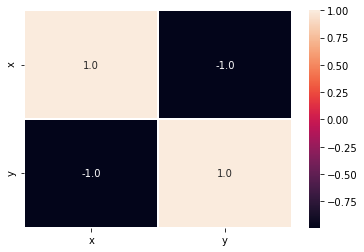

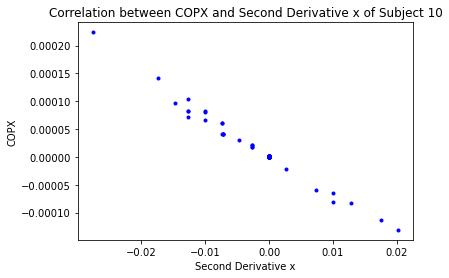

[[ 1. nan]
 [nan nan]]


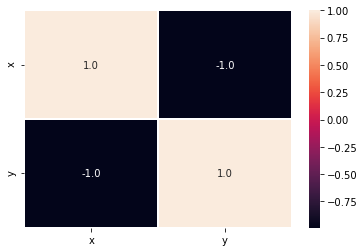

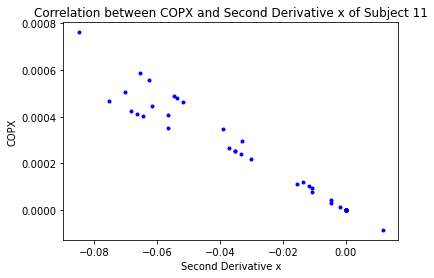

[[ 1. nan]
 [nan nan]]


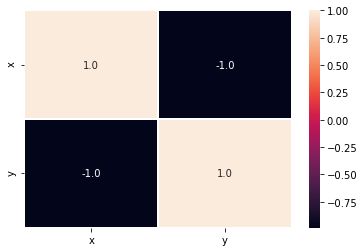

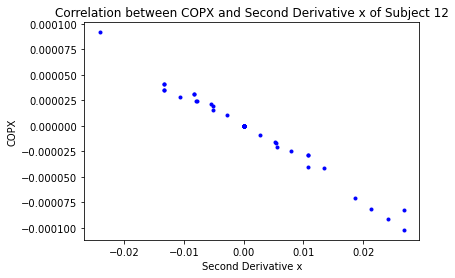

[[ 1. nan]
 [nan nan]]


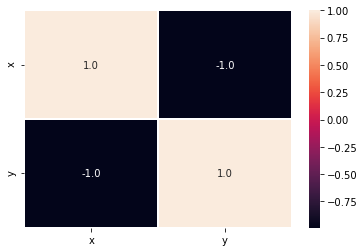

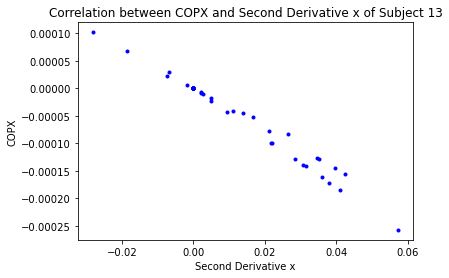

[[ 1. nan]
 [nan nan]]


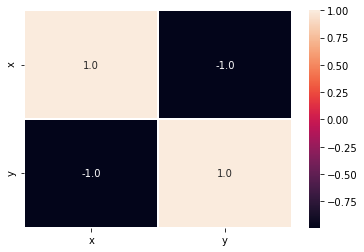

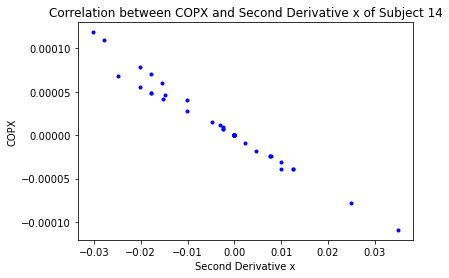

[[ 1. nan]
 [nan nan]]


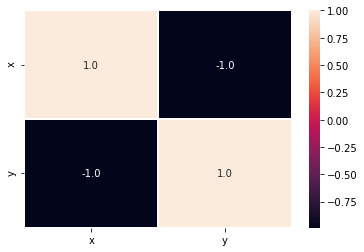

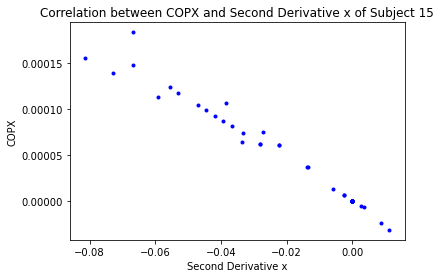

[[ 1. nan]
 [nan nan]]


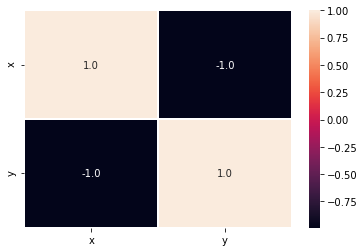

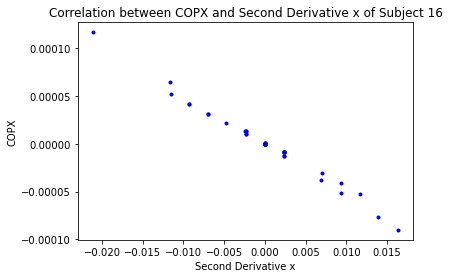

[[ 1. nan]
 [nan nan]]


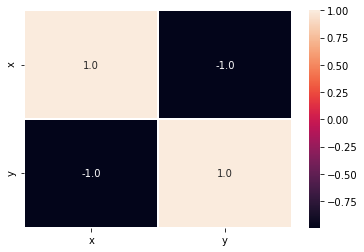

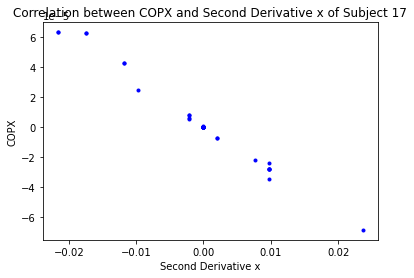

[[ 1. nan]
 [nan nan]]


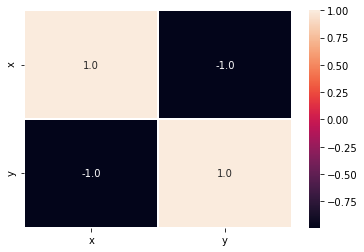

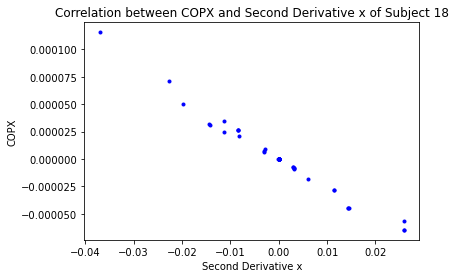

[[ 1. nan]
 [nan nan]]


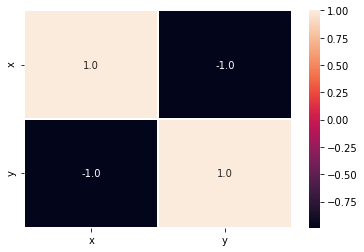

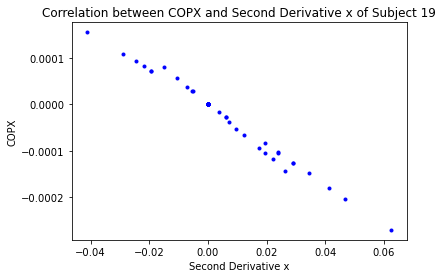

[[ 1. nan]
 [nan nan]]


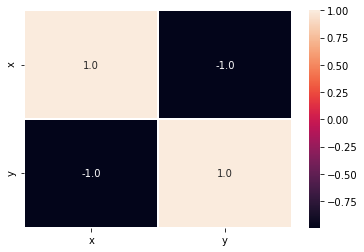

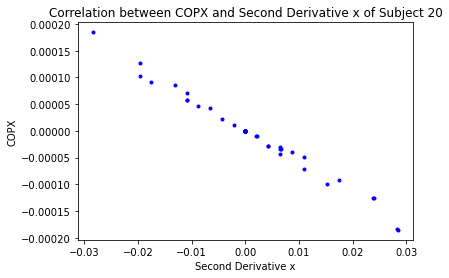

[[ 1. nan]
 [nan nan]]


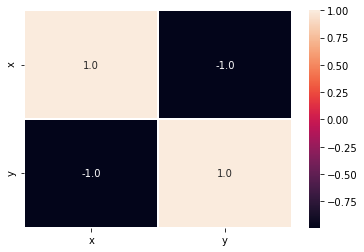

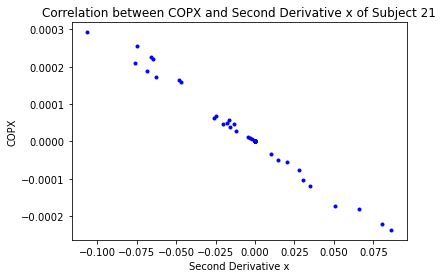

[[ 1. nan]
 [nan nan]]


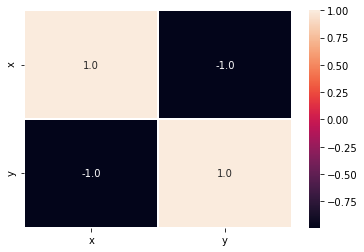

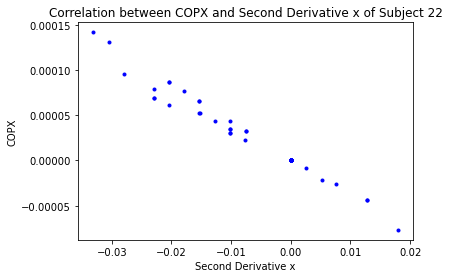

[[ 1. nan]
 [nan nan]]


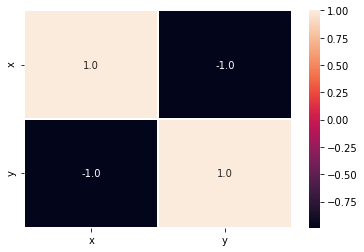

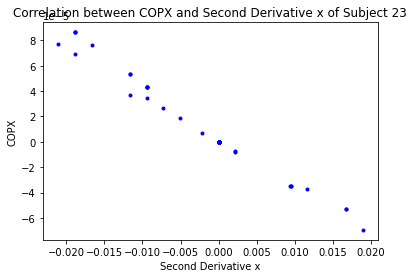

[[ 1. nan]
 [nan nan]]


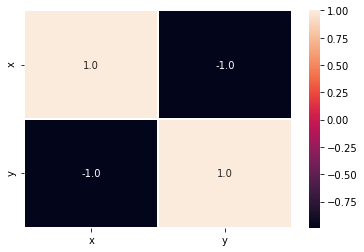

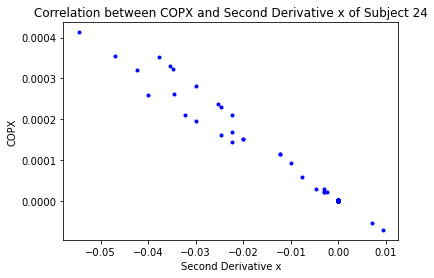

[[ 1. nan]
 [nan nan]]


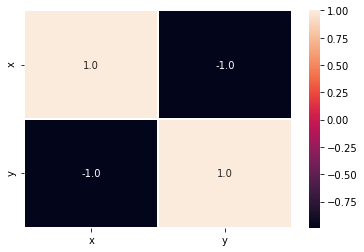

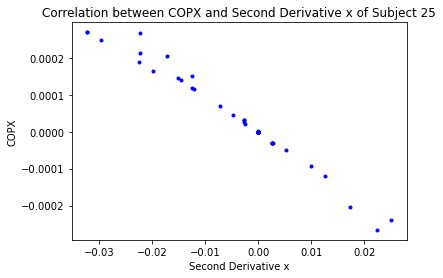

[[ 1. nan]
 [nan nan]]


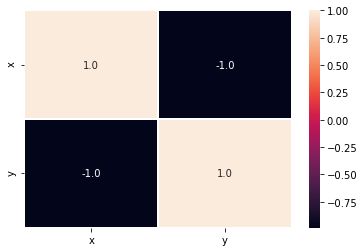

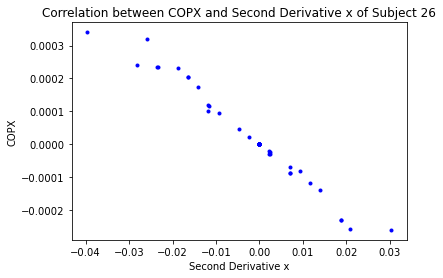

[[ 1. nan]
 [nan nan]]


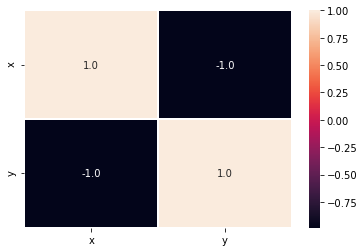

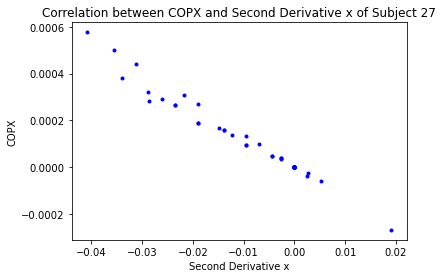

[[ 1. nan]
 [nan nan]]


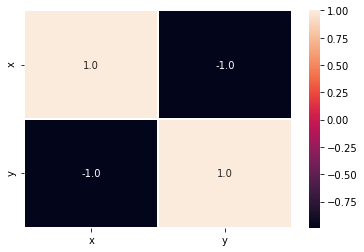

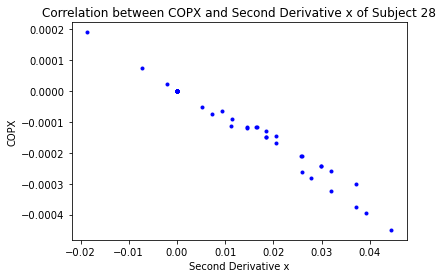

[[ 1. nan]
 [nan nan]]


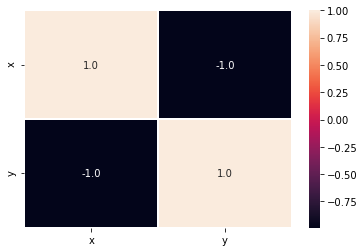

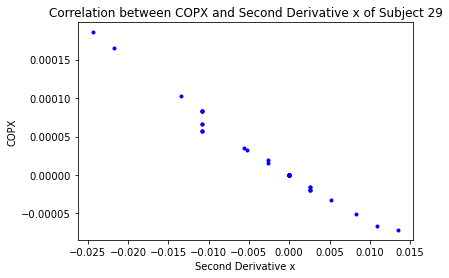

[[ 1. nan]
 [nan nan]]


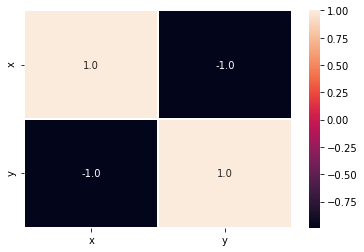

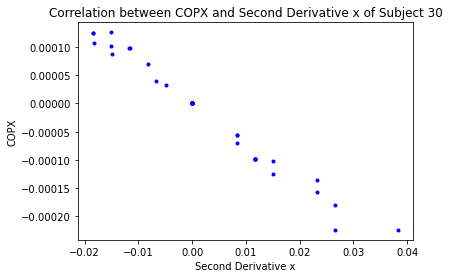

[[ 1. nan]
 [nan nan]]


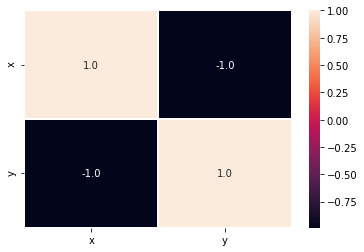

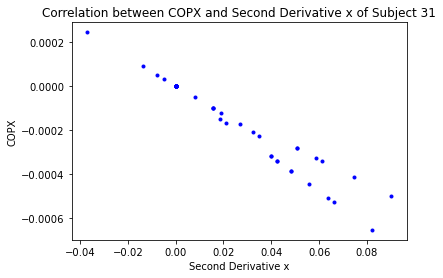

[[ 1. nan]
 [nan nan]]


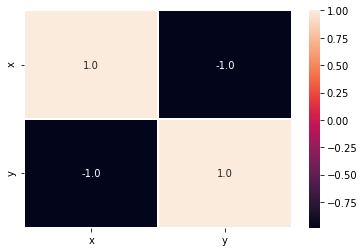

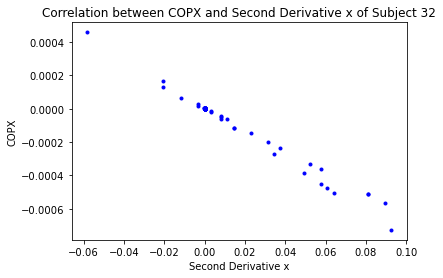

[[ 1. nan]
 [nan nan]]


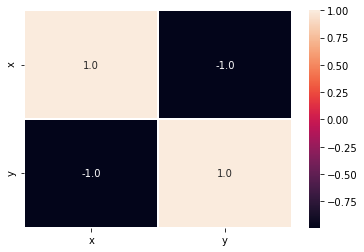

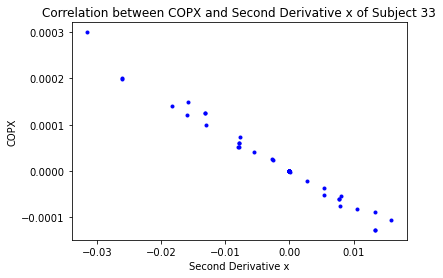

[[ 1. nan]
 [nan nan]]


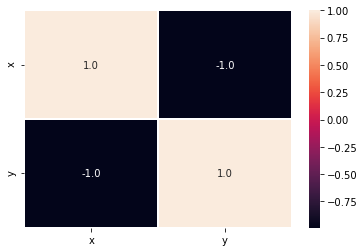

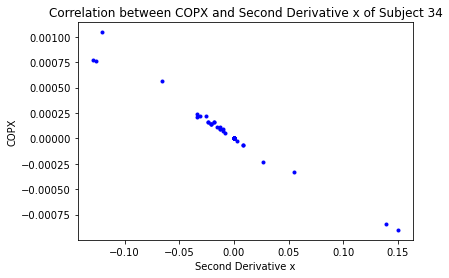

[[ 1. nan]
 [nan nan]]


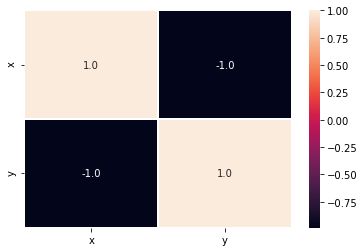

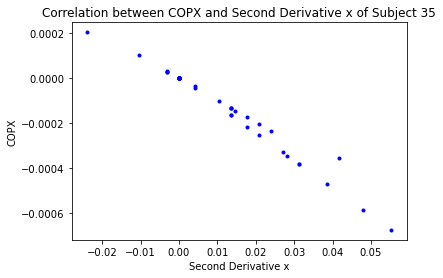

[[ 1. nan]
 [nan nan]]


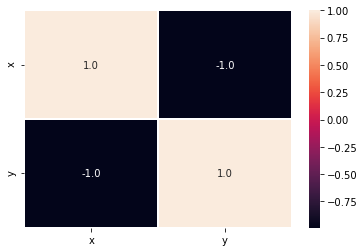

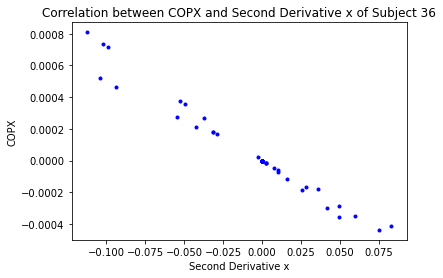

[[ 1. nan]
 [nan nan]]


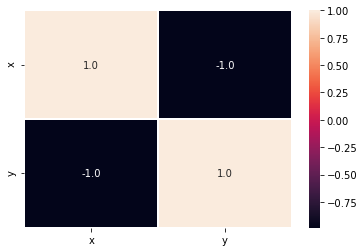

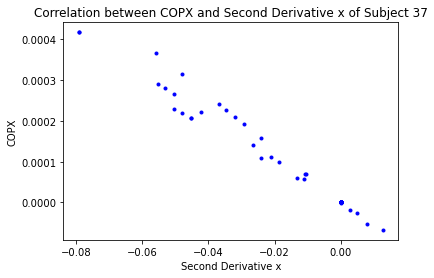

[[ 1. nan]
 [nan nan]]


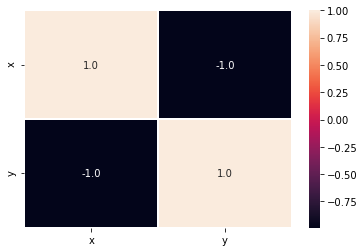

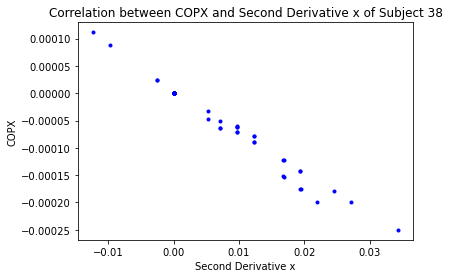

[[ 1. nan]
 [nan nan]]


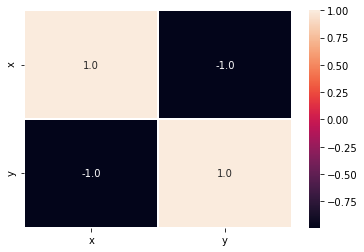

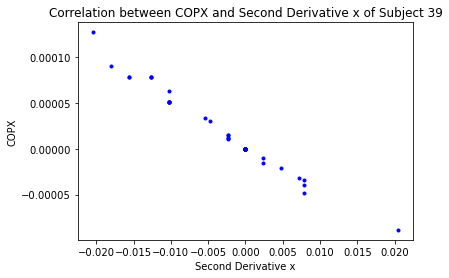

[[ 1. nan]
 [nan nan]]


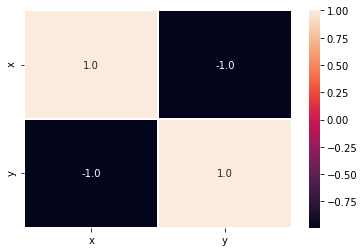

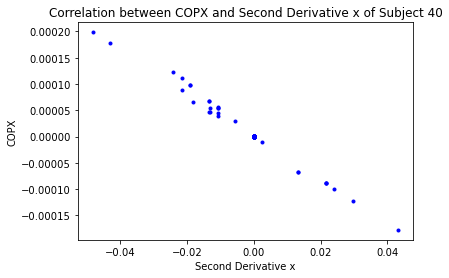

[[ 1. nan]
 [nan nan]]


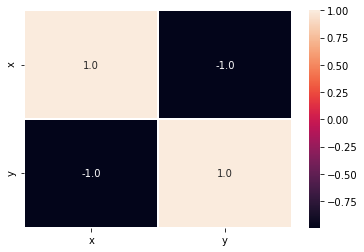

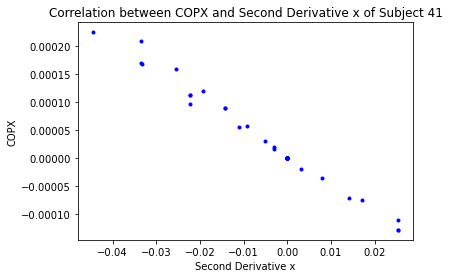

[[ 1. nan]
 [nan nan]]


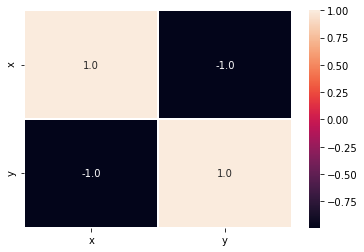

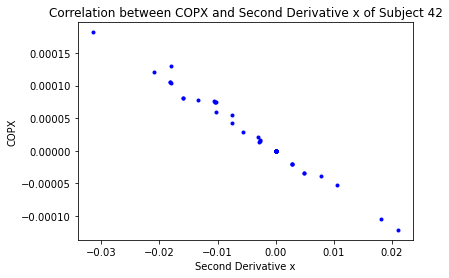

[[ 1. nan]
 [nan nan]]


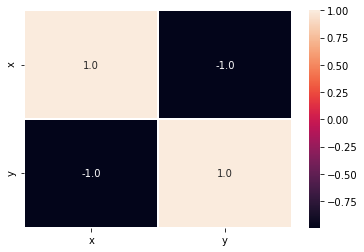

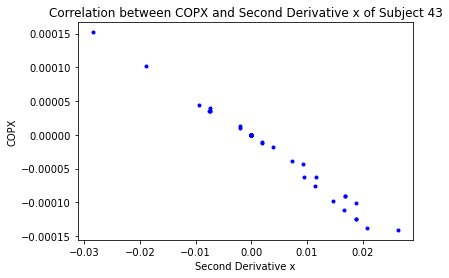

[[ 1. nan]
 [nan nan]]


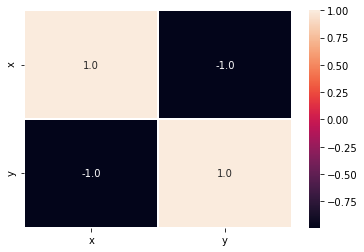

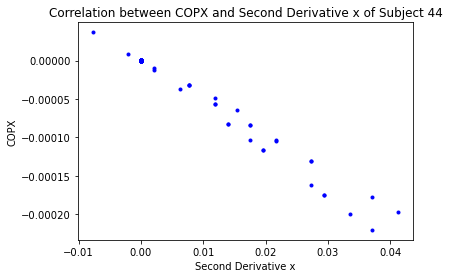

[[ 1. nan]
 [nan nan]]


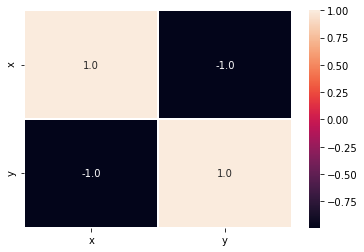

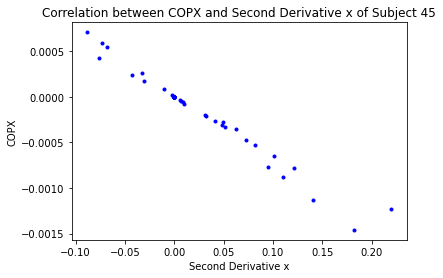

[[ 1. nan]
 [nan nan]]


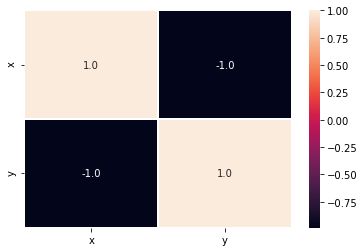

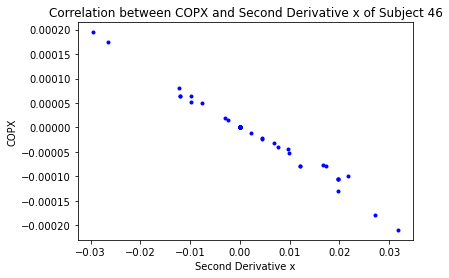

[[ 1. nan]
 [nan nan]]


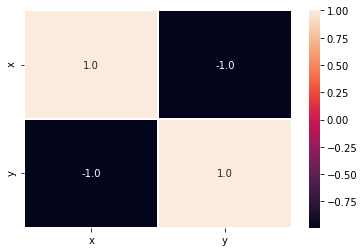

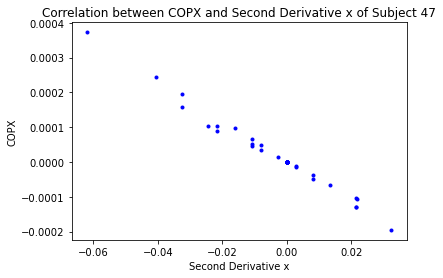

[[ 1. nan]
 [nan nan]]


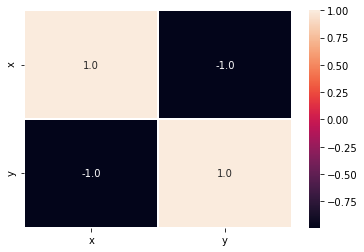

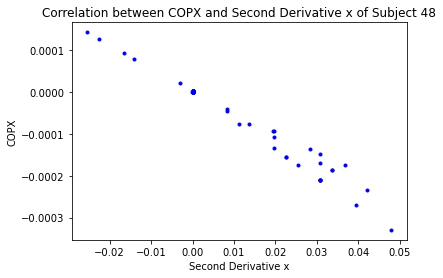

[[ 1. nan]
 [nan nan]]


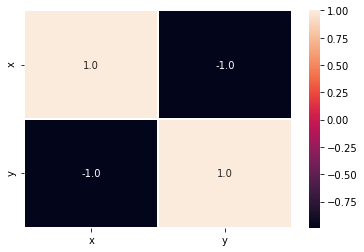

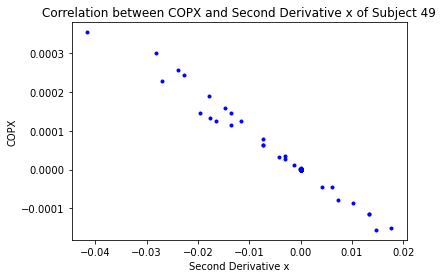

[[ 1. nan]
 [nan nan]]


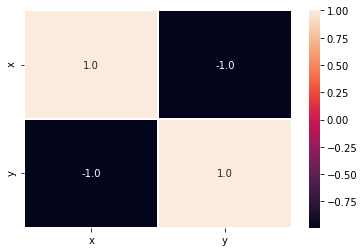

In [19]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2x,
         'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative x")
    plt.ylabel("COPX")
    plt.title("Correlation between COPX and Second Derivative x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2x,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':d2x,
          'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

# Correlation between COPZ and Angle z

## Correlation between COPZ and Angle z

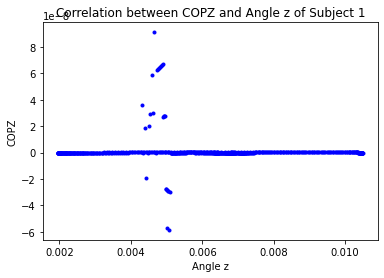

[[ 1. nan]
 [nan nan]]


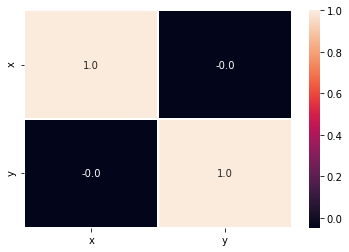

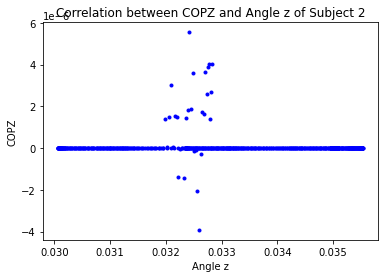

[[ 1. nan]
 [nan nan]]


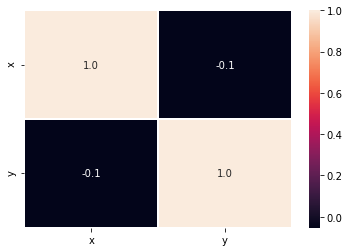

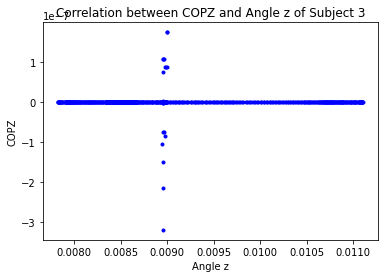

[[ 1. nan]
 [nan nan]]


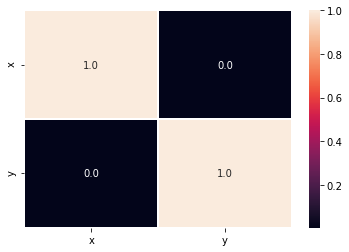

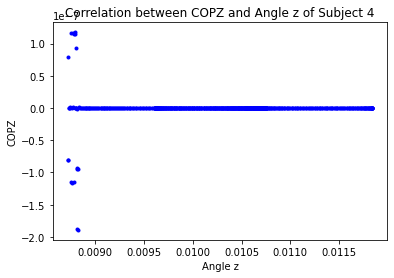

[[ 1. nan]
 [nan nan]]


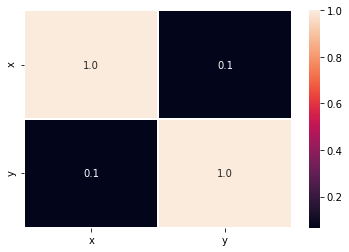

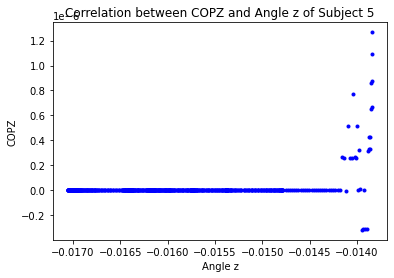

[[ 1. nan]
 [nan nan]]


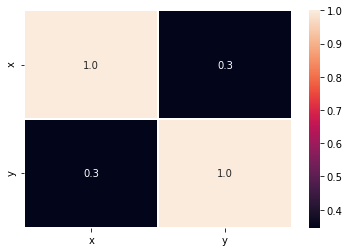

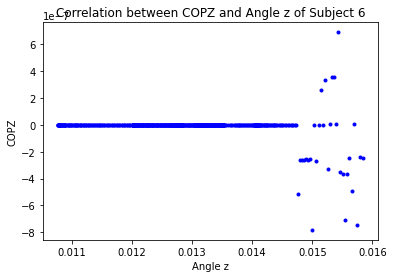

[[ 1. nan]
 [nan nan]]


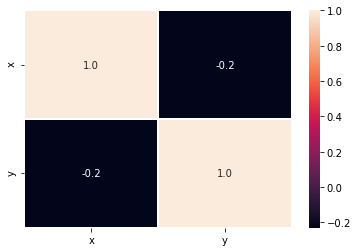

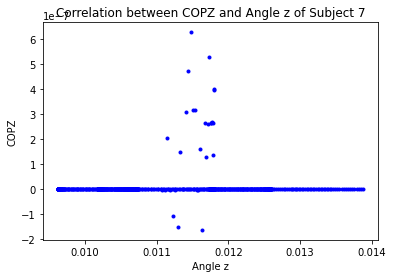

[[ 1. nan]
 [nan nan]]


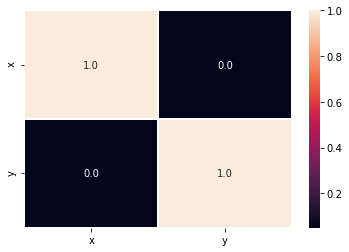

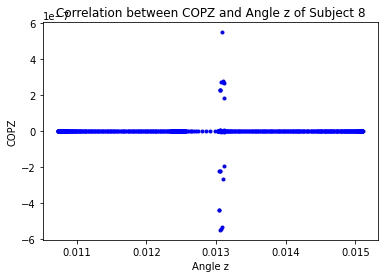

[[ 1. nan]
 [nan nan]]


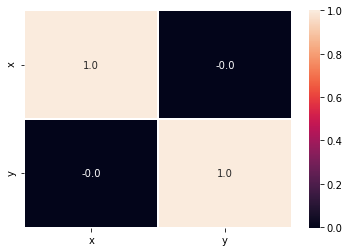

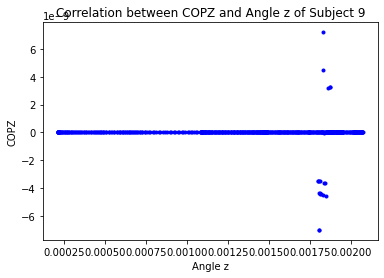

[[ 1. nan]
 [nan nan]]


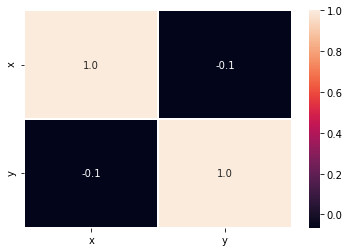

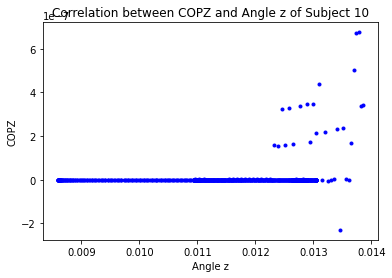

[[ 1. nan]
 [nan nan]]


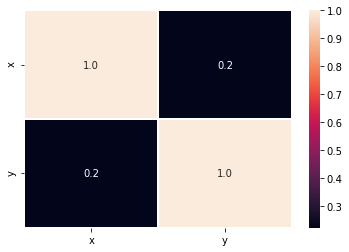

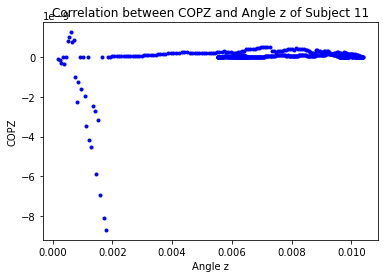

[[ 1. nan]
 [nan nan]]


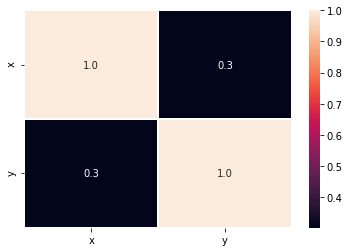

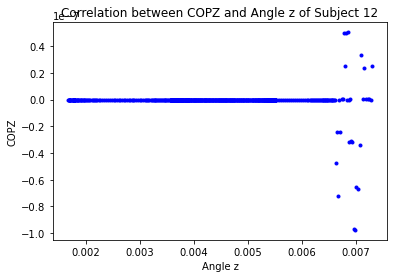

[[ 1. nan]
 [nan nan]]


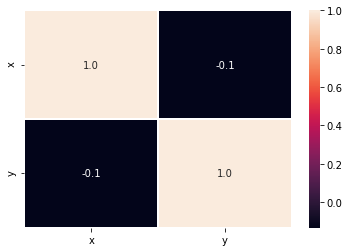

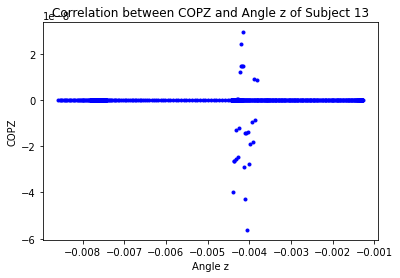

[[ 1. nan]
 [nan nan]]


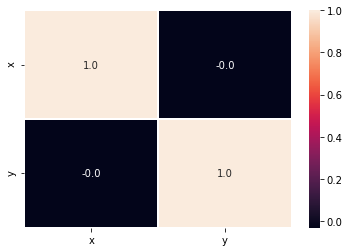

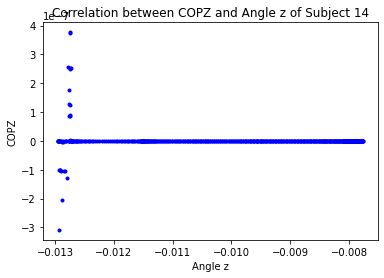

[[ 1. nan]
 [nan nan]]


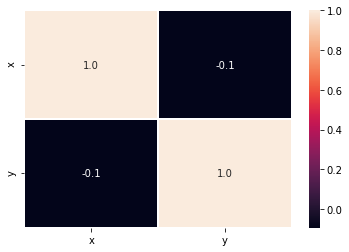

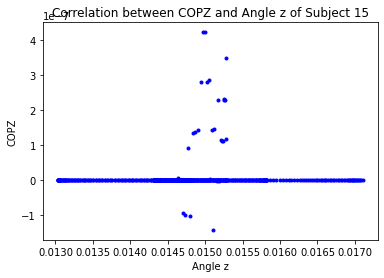

[[ 1. nan]
 [nan nan]]


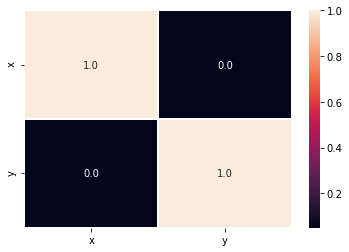

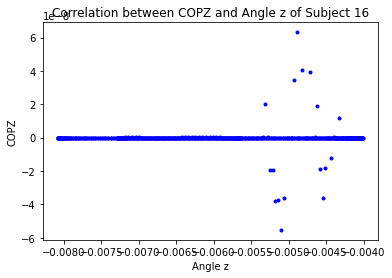

[[ 1. nan]
 [nan nan]]


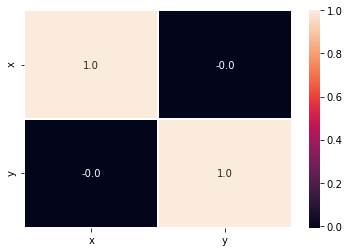

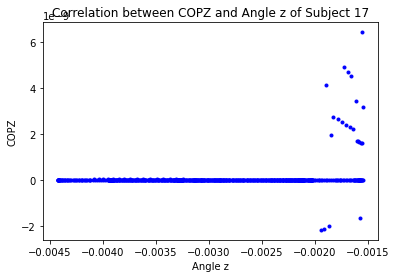

[[ 1. nan]
 [nan nan]]


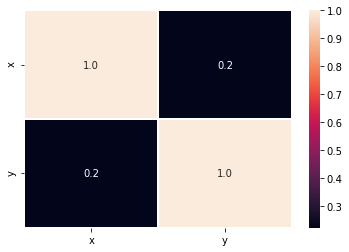

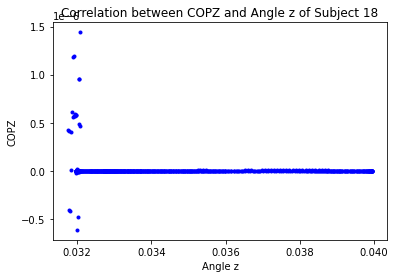

[[ 1. nan]
 [nan nan]]


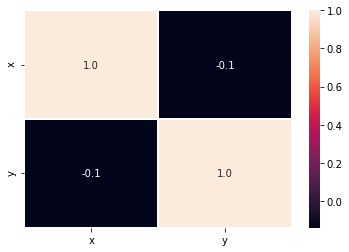

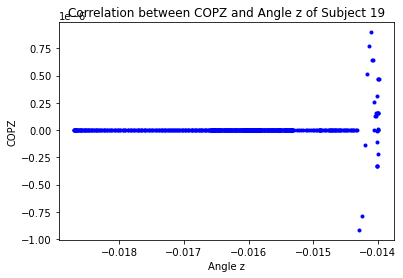

[[ 1. nan]
 [nan nan]]


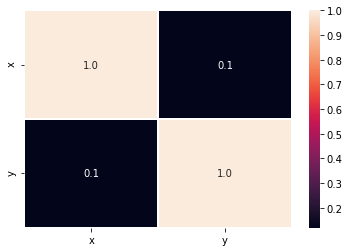

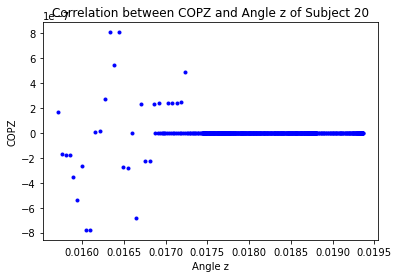

[[ 1. nan]
 [nan nan]]


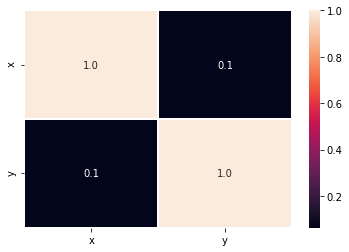

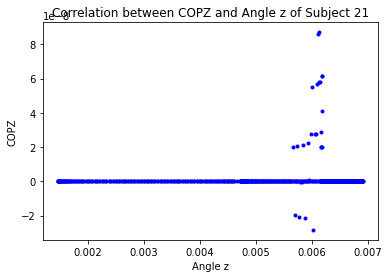

[[ 1. nan]
 [nan nan]]


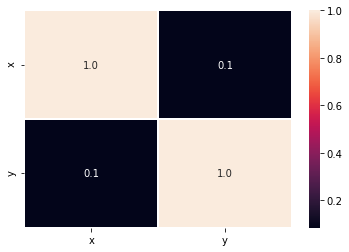

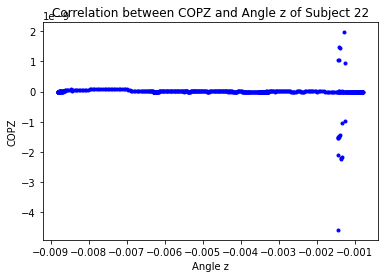

[[ 1. nan]
 [nan nan]]


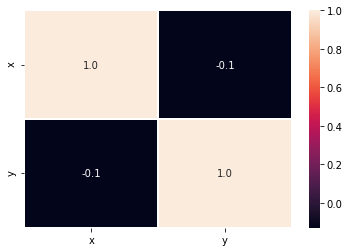

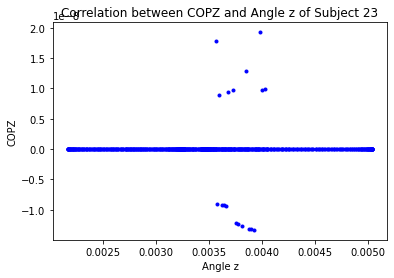

[[ 1. nan]
 [nan nan]]


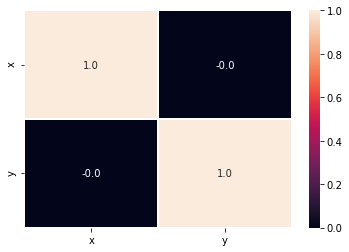

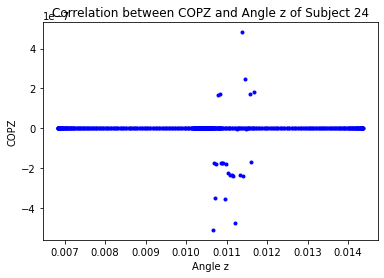

[[ 1. nan]
 [nan nan]]


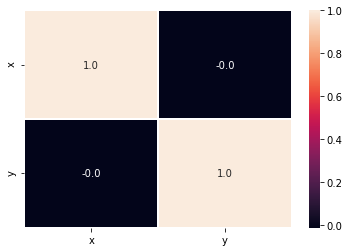

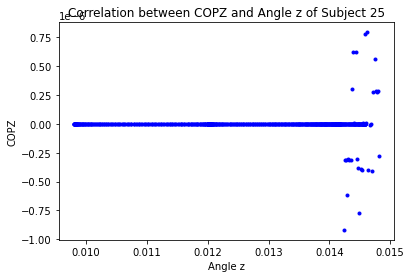

[[ 1. nan]
 [nan nan]]


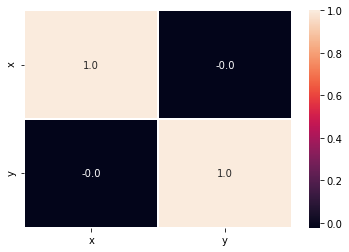

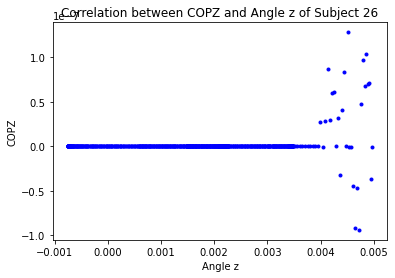

[[ 1. nan]
 [nan nan]]


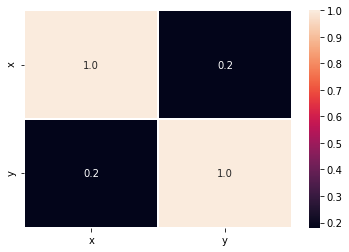

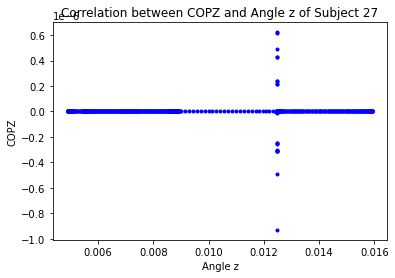

[[ 1. nan]
 [nan nan]]


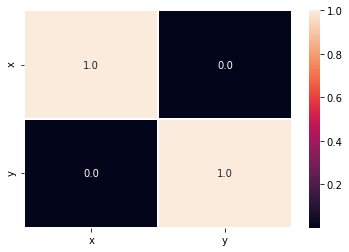

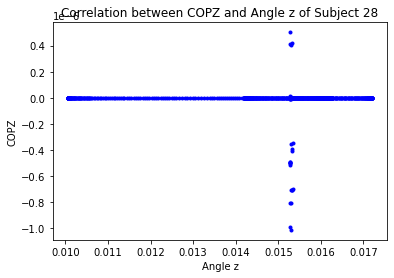

[[ 1. nan]
 [nan nan]]


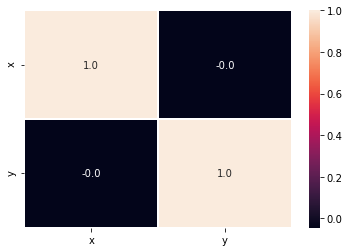

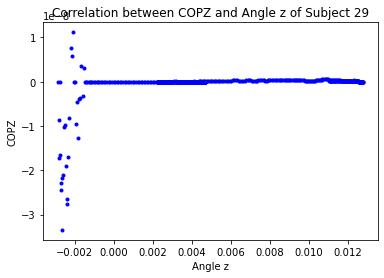

[[ 1. nan]
 [nan nan]]


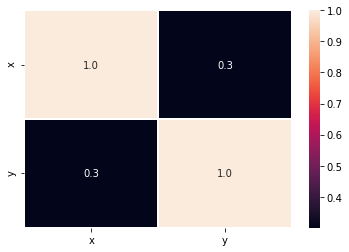

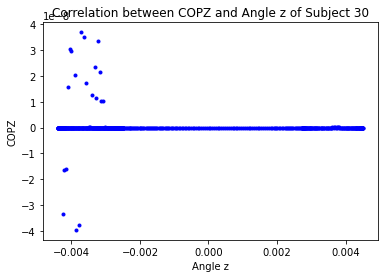

[[ 1. nan]
 [nan nan]]


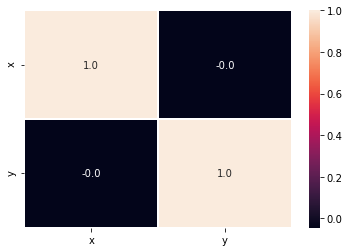

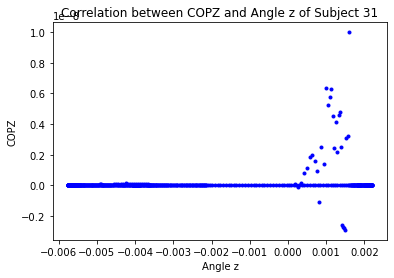

[[ 1. nan]
 [nan nan]]


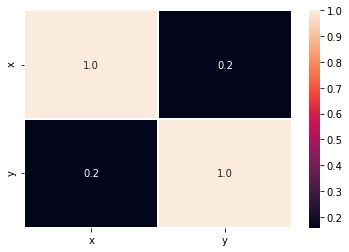

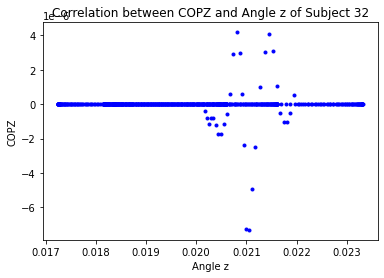

[[ 1. nan]
 [nan nan]]


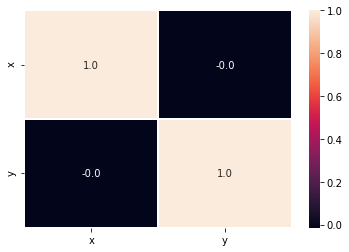

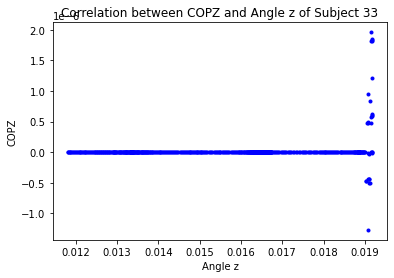

[[ 1. nan]
 [nan nan]]


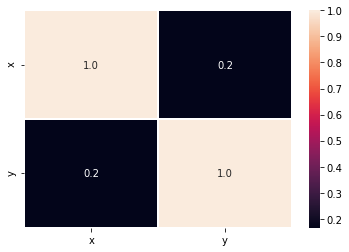

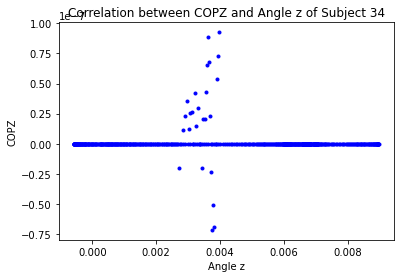

[[ 1. nan]
 [nan nan]]


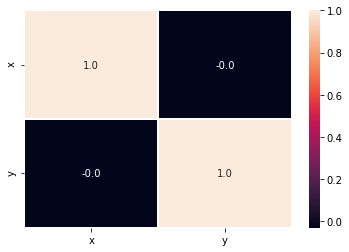

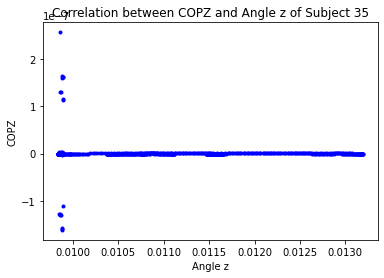

[[ 1. nan]
 [nan nan]]


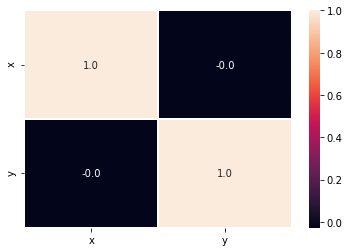

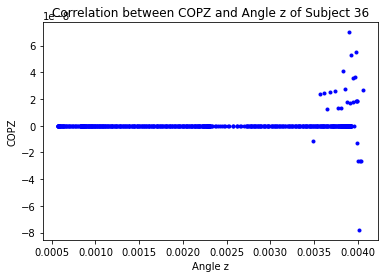

[[ 1. nan]
 [nan nan]]


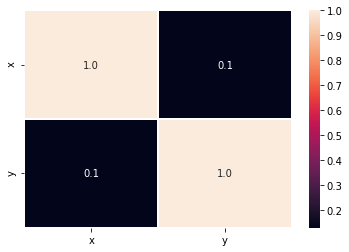

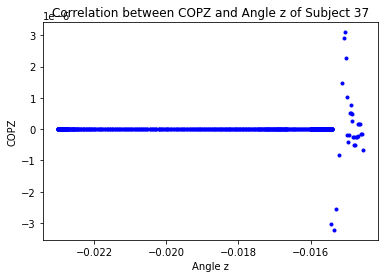

[[ 1. nan]
 [nan nan]]


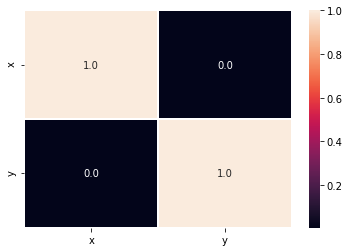

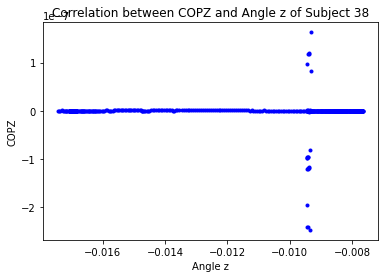

[[ 1. nan]
 [nan nan]]


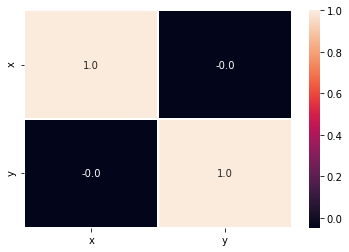

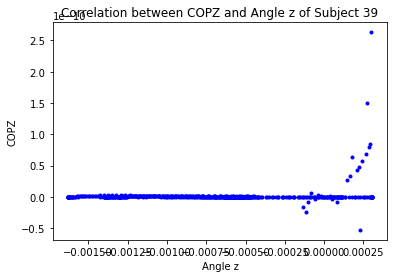

[[ 1. nan]
 [nan nan]]


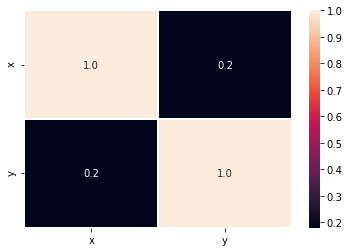

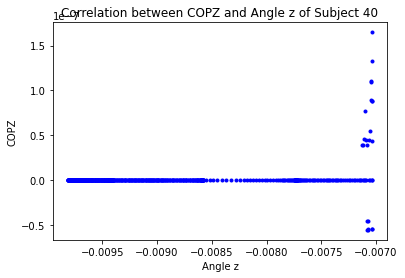

[[ 1. nan]
 [nan nan]]


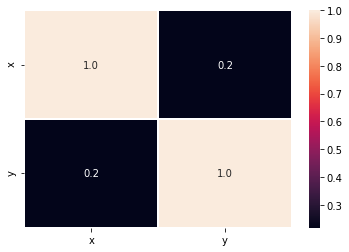

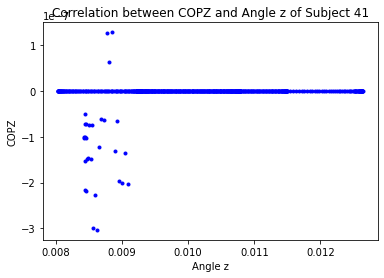

[[ 1. nan]
 [nan nan]]


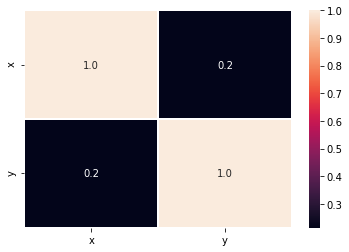

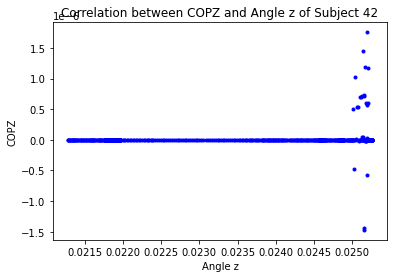

[[ 1. nan]
 [nan nan]]


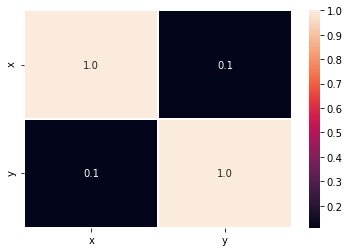

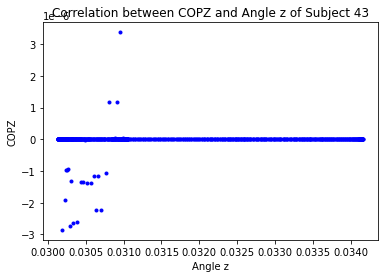

[[ 1. nan]
 [nan nan]]


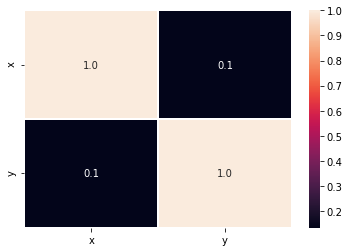

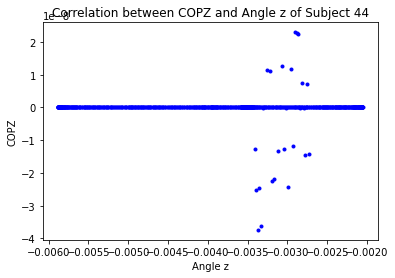

[[ 1. nan]
 [nan nan]]


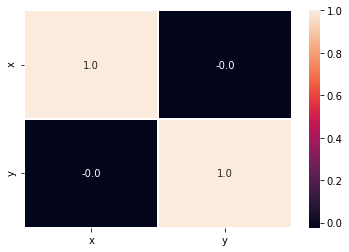

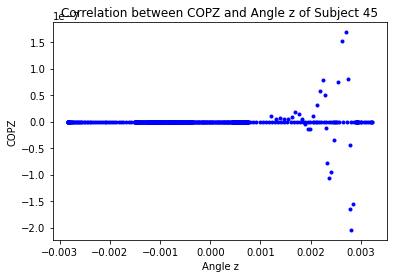

[[ 1. nan]
 [nan nan]]


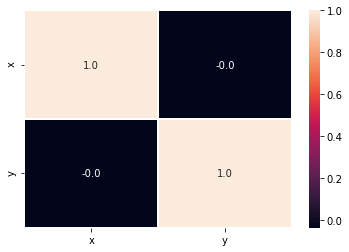

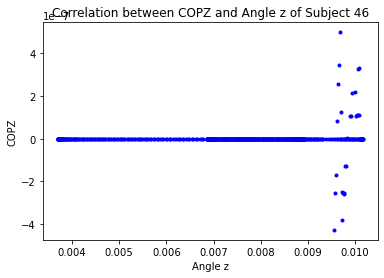

[[ 1. nan]
 [nan nan]]


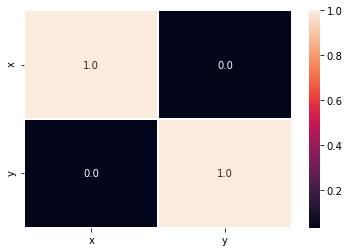

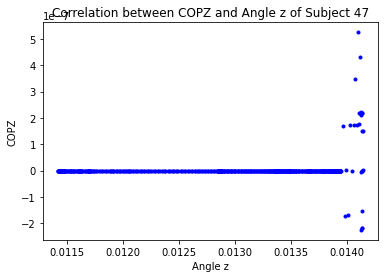

[[ 1. nan]
 [nan nan]]


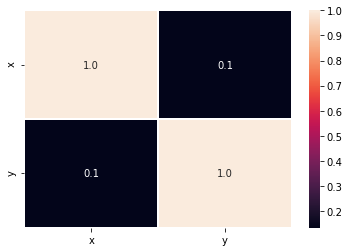

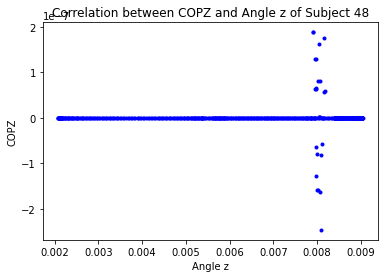

[[ 1. nan]
 [nan nan]]


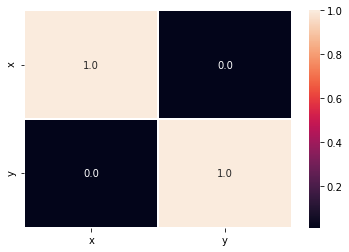

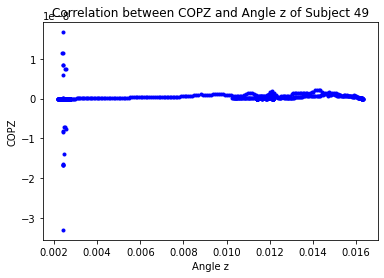

[[ 1. nan]
 [nan nan]]


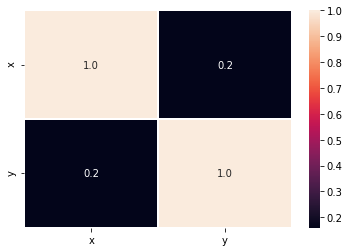

In [22]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':matrizangz,
         'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    #ax=sns.lmplot(x=matrizangx, y=errorx, data= df)
    #ax
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Angle z")
    plt.ylabel("COPZ")
    plt.title("Correlation between COPZ and Angle z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(matrizangz,COPZmatrix)
    print(r)
    plt.figure()
    data={'x':matrizangz,
          'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

## Correlation between COPZ and First Derivative z

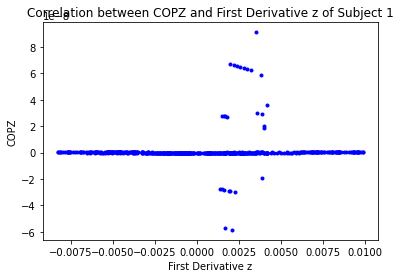

[[ 1. nan]
 [nan nan]]


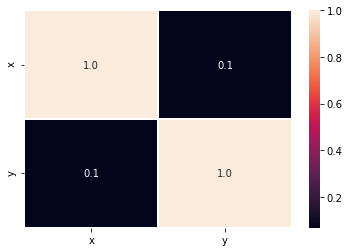

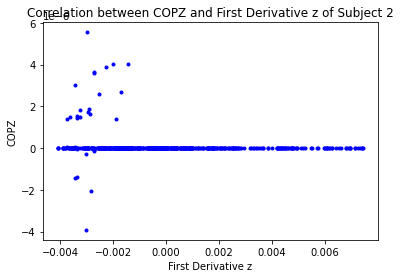

[[ 1. nan]
 [nan nan]]


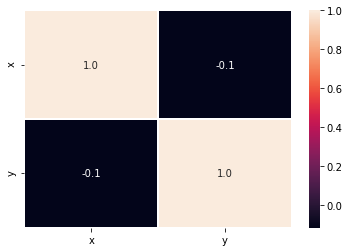

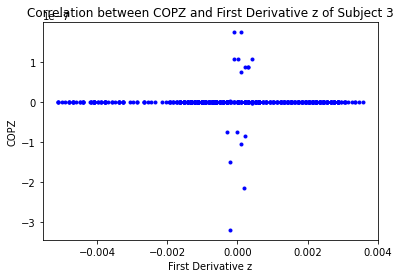

[[ 1. nan]
 [nan nan]]


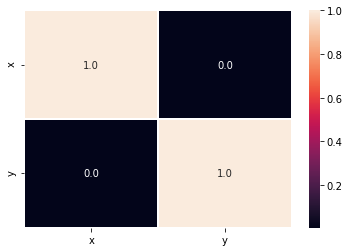

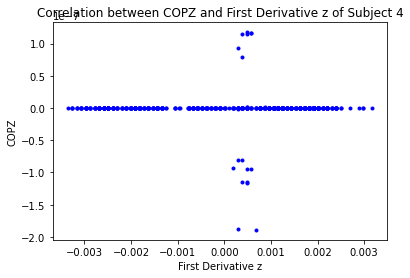

[[ 1. nan]
 [nan nan]]


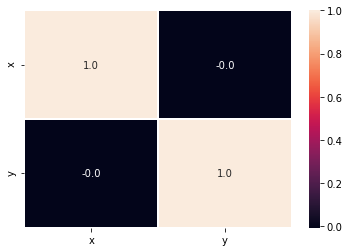

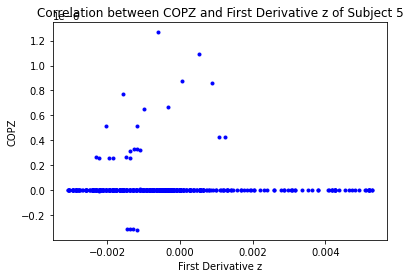

[[ 1. nan]
 [nan nan]]


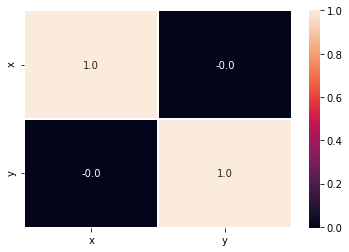

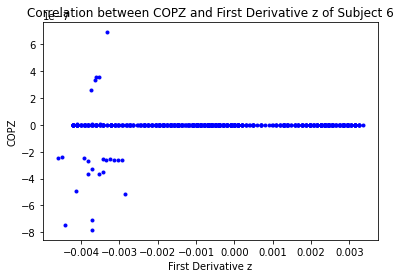

[[ 1. nan]
 [nan nan]]


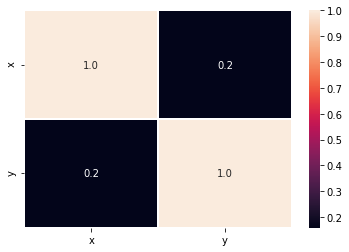

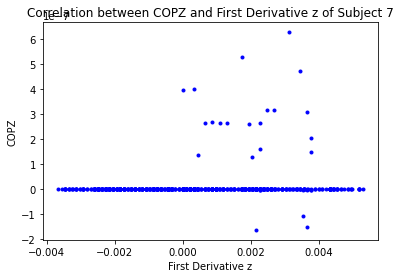

[[ 1. nan]
 [nan nan]]


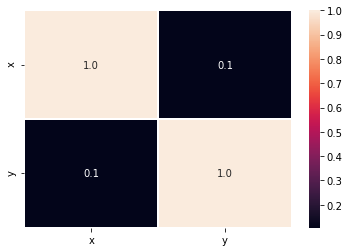

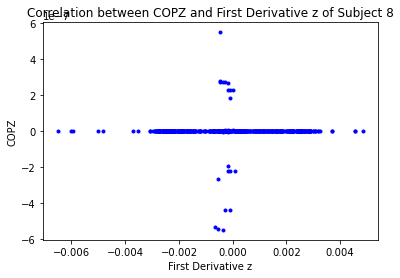

[[ 1. nan]
 [nan nan]]


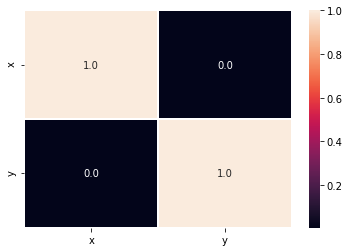

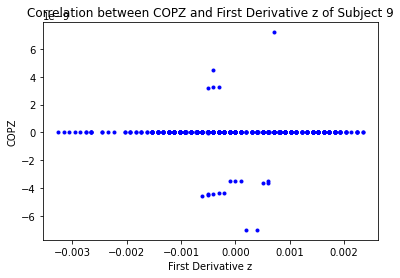

[[ 1. nan]
 [nan nan]]


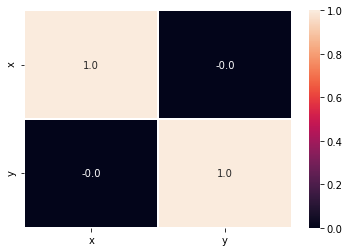

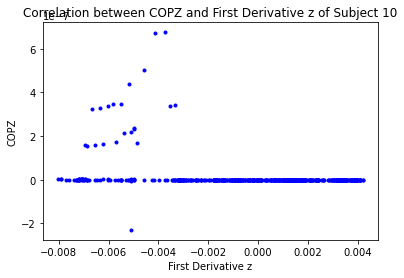

[[ 1. nan]
 [nan nan]]


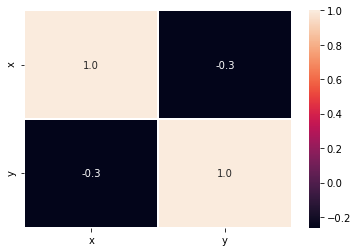

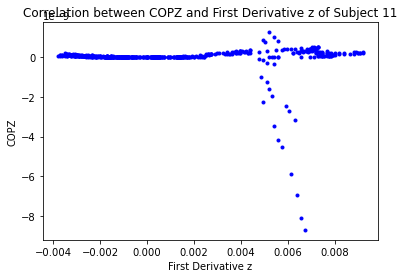

[[ 1. nan]
 [nan nan]]


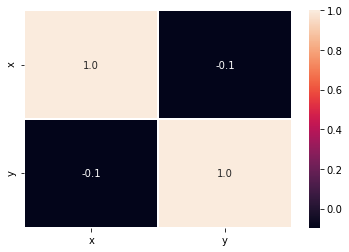

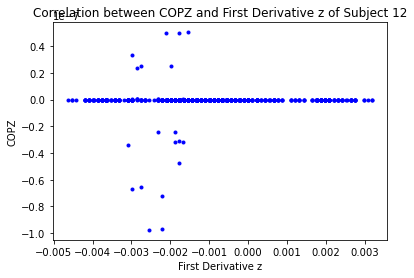

[[ 1. nan]
 [nan nan]]


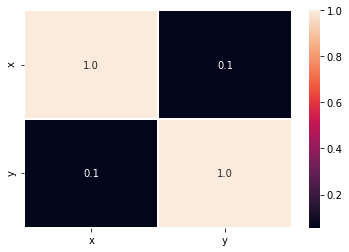

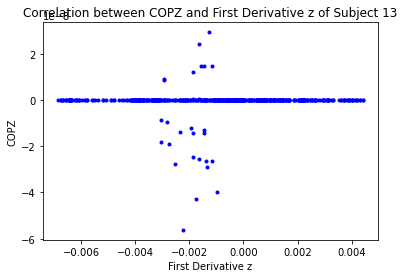

[[ 1. nan]
 [nan nan]]


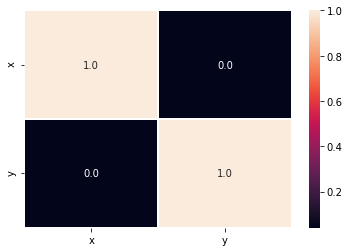

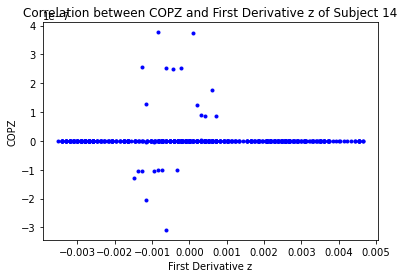

[[ 1. nan]
 [nan nan]]


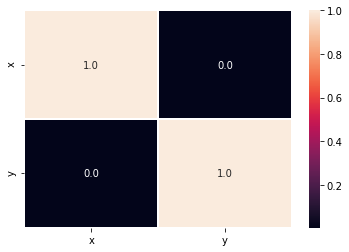

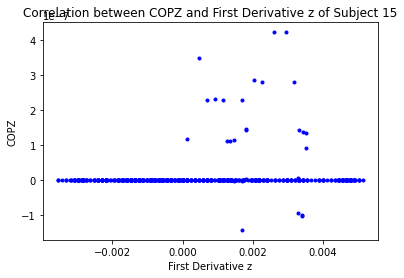

[[ 1. nan]
 [nan nan]]


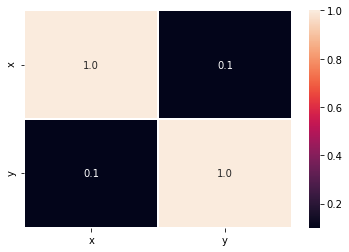

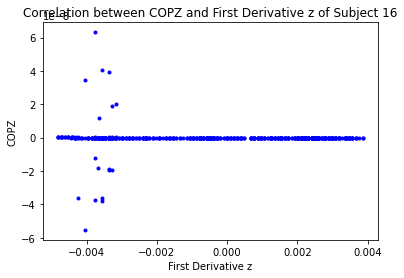

[[ 1. nan]
 [nan nan]]


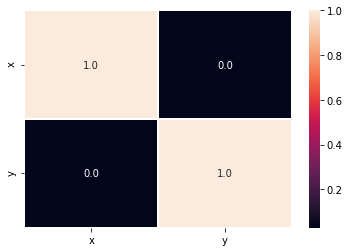

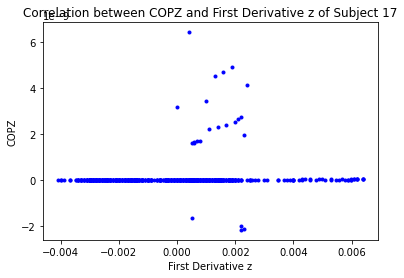

[[ 1. nan]
 [nan nan]]


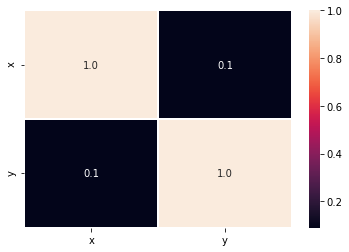

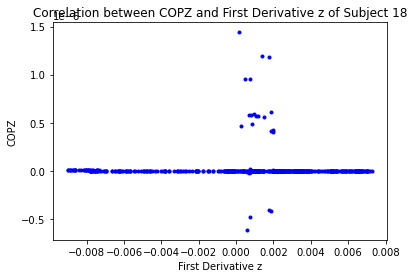

[[ 1. nan]
 [nan nan]]


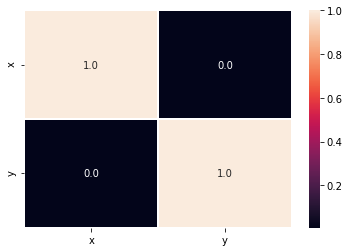

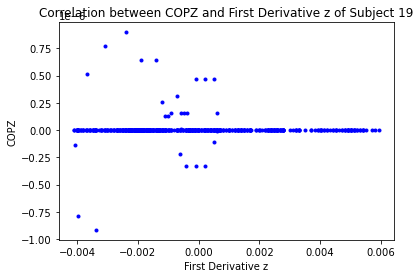

[[ 1. nan]
 [nan nan]]


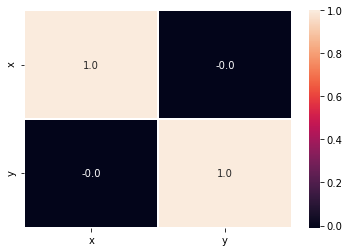

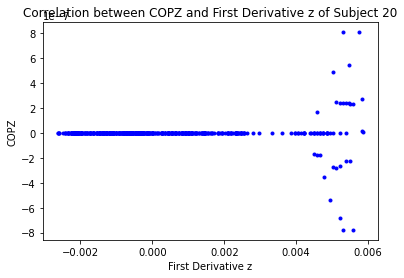

[[ 1. nan]
 [nan nan]]


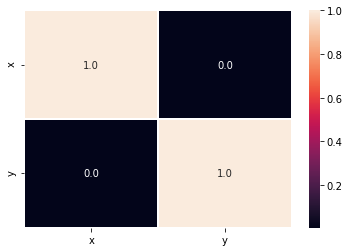

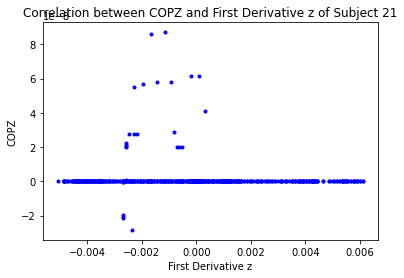

[[ 1. nan]
 [nan nan]]


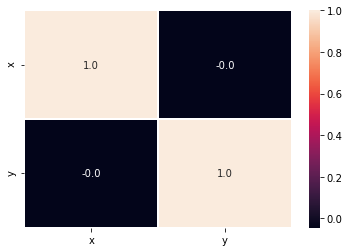

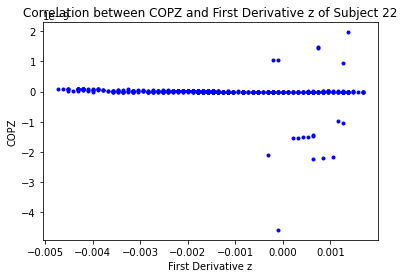

[[ 1. nan]
 [nan nan]]


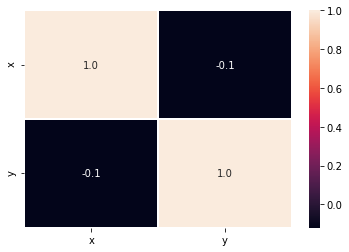

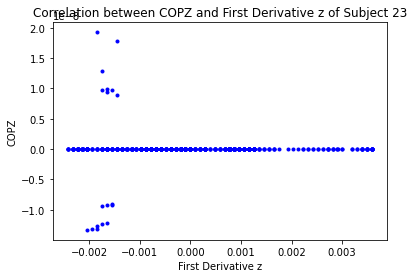

[[ 1. nan]
 [nan nan]]


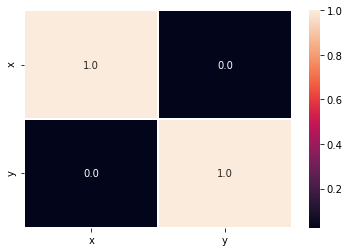

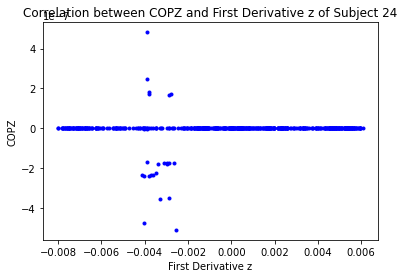

[[ 1. nan]
 [nan nan]]


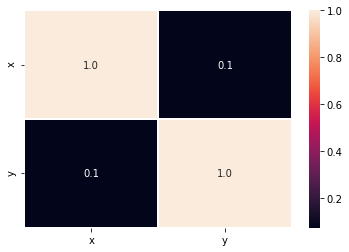

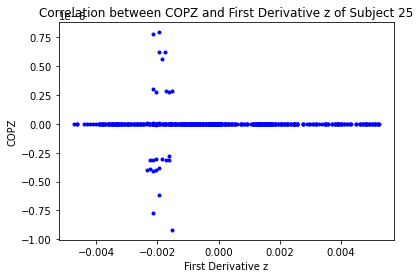

[[ 1. nan]
 [nan nan]]


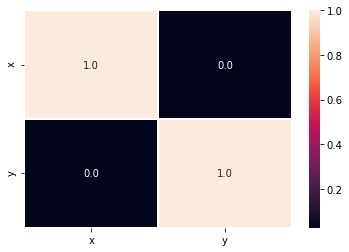

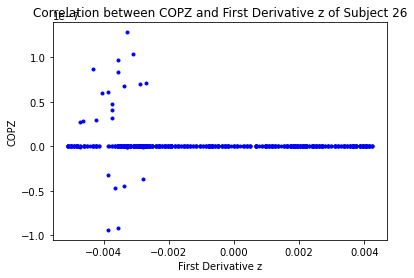

[[ 1. nan]
 [nan nan]]


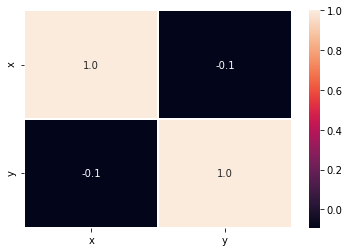

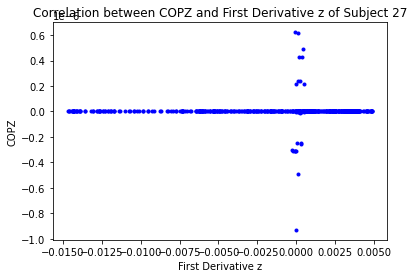

[[ 1. nan]
 [nan nan]]


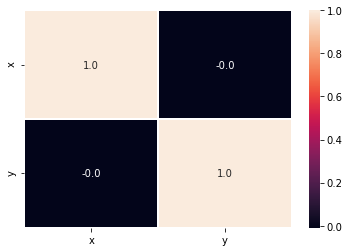

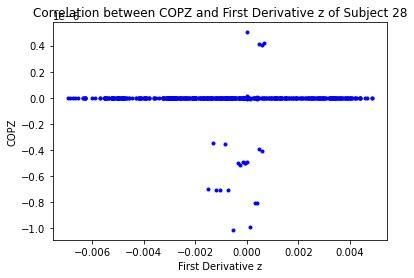

[[ 1. nan]
 [nan nan]]


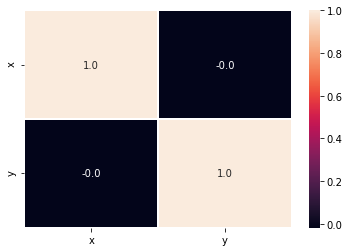

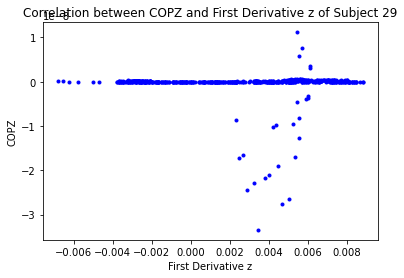

[[ 1. nan]
 [nan nan]]


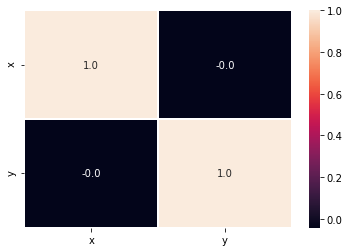

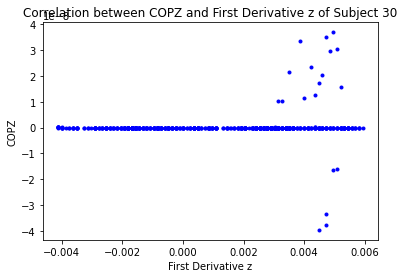

[[ 1. nan]
 [nan nan]]


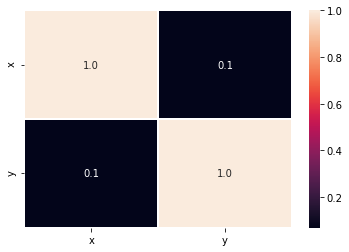

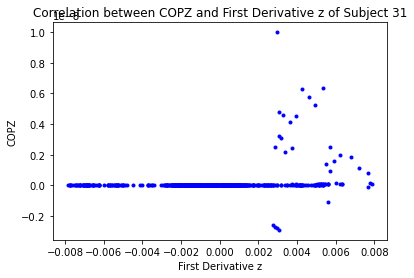

[[ 1. nan]
 [nan nan]]


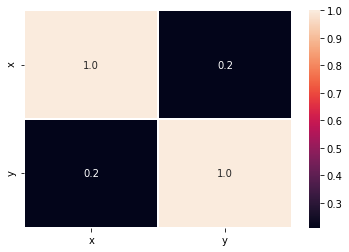

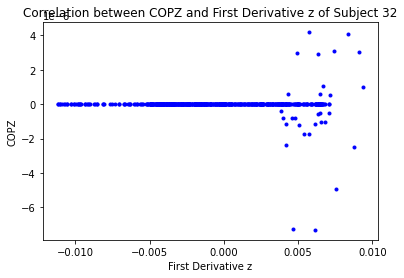

[[ 1. nan]
 [nan nan]]


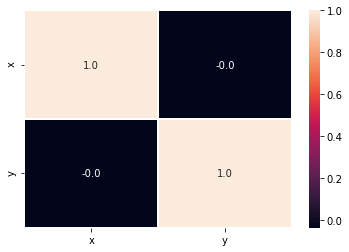

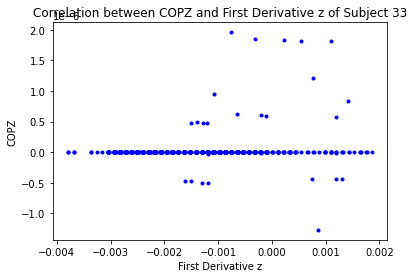

[[ 1. nan]
 [nan nan]]


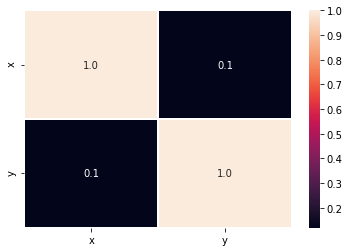

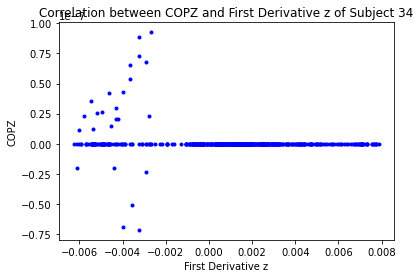

[[ 1. nan]
 [nan nan]]


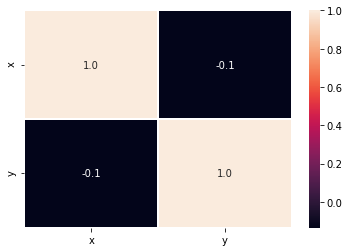

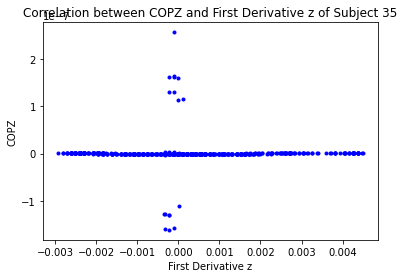

[[ 1. nan]
 [nan nan]]


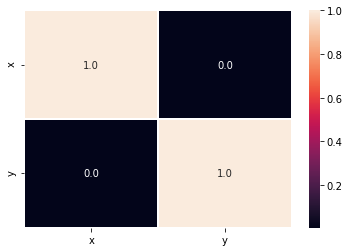

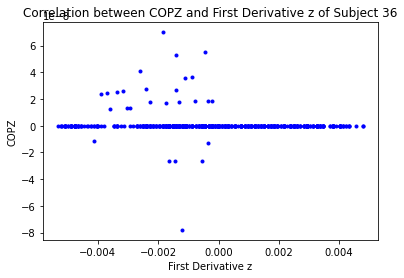

[[ 1. nan]
 [nan nan]]


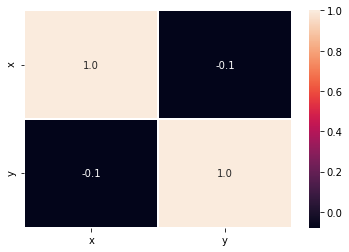

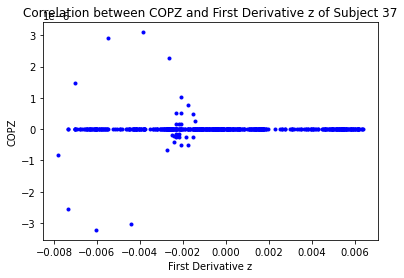

[[ 1. nan]
 [nan nan]]


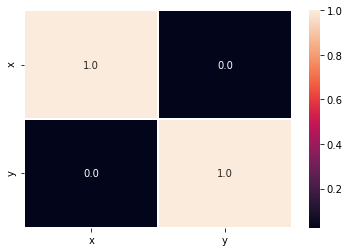

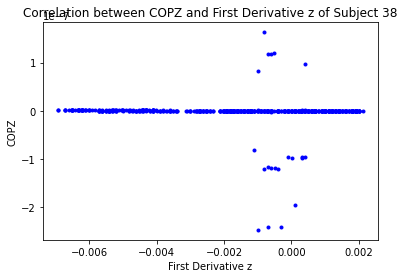

[[ 1. nan]
 [nan nan]]


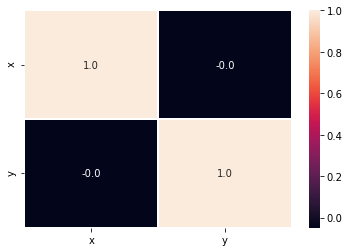

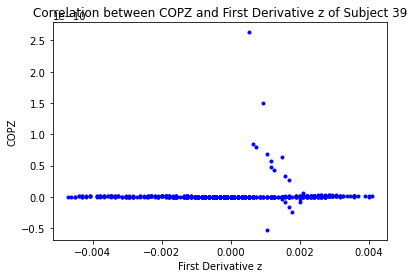

[[ 1. nan]
 [nan nan]]


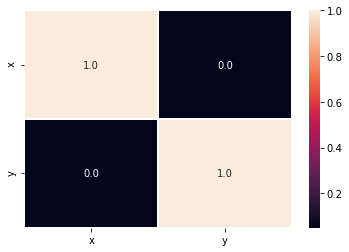

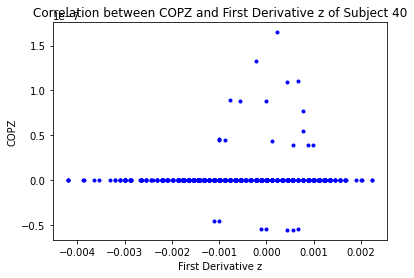

[[ 1. nan]
 [nan nan]]


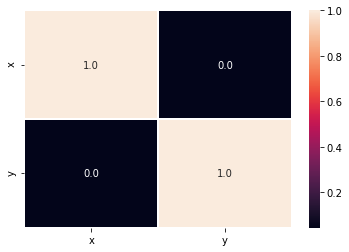

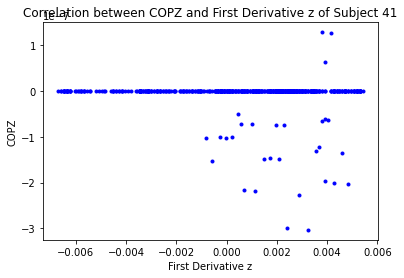

[[ 1. nan]
 [nan nan]]


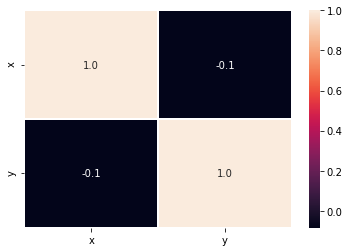

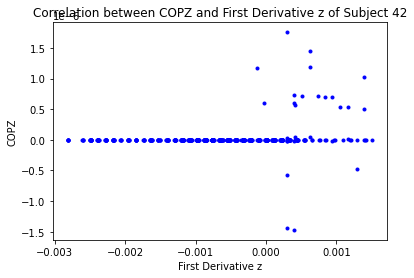

[[ 1. nan]
 [nan nan]]


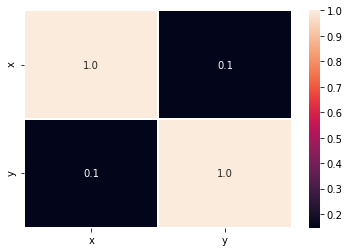

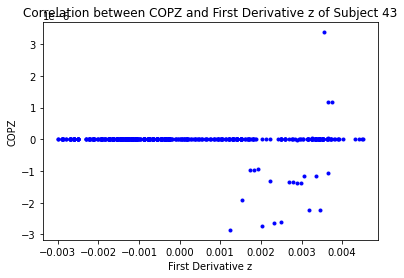

[[ 1. nan]
 [nan nan]]


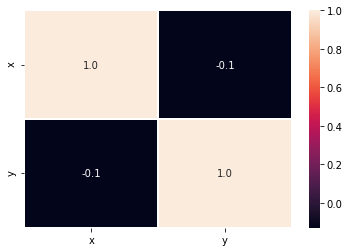

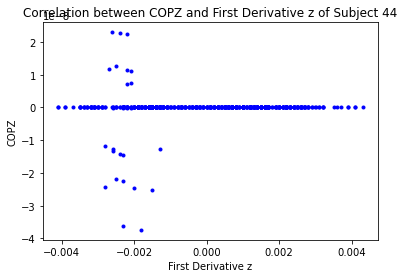

[[ 1. nan]
 [nan nan]]


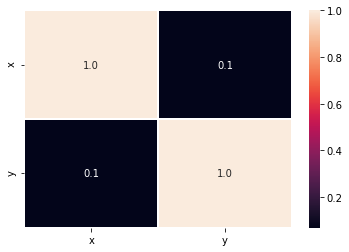

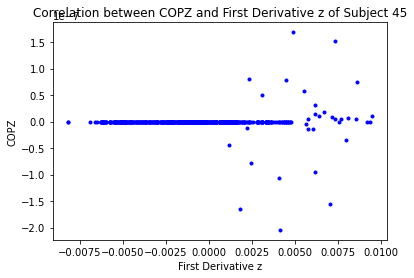

[[ 1. nan]
 [nan nan]]


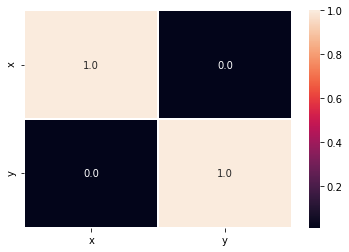

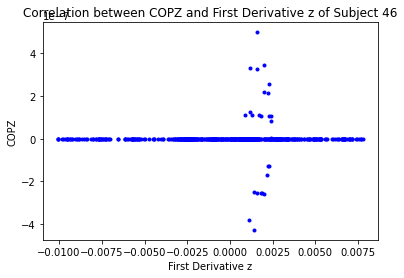

[[ 1. nan]
 [nan nan]]


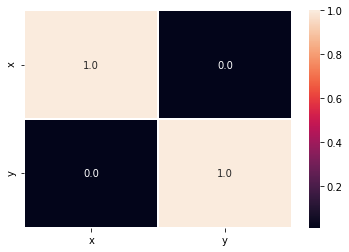

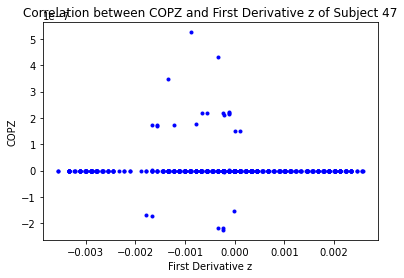

[[ 1. nan]
 [nan nan]]


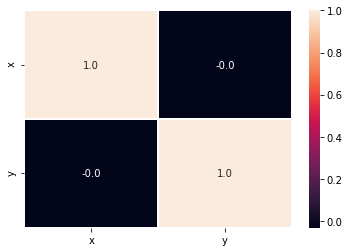

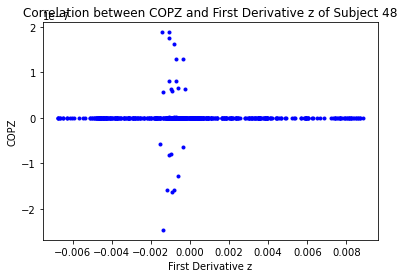

[[ 1. nan]
 [nan nan]]


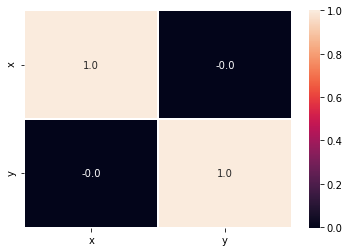

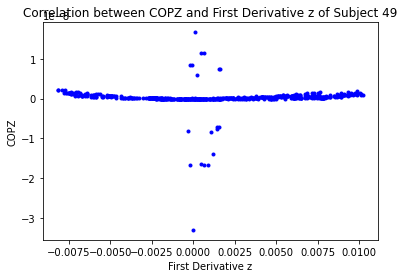

[[ 1. nan]
 [nan nan]]


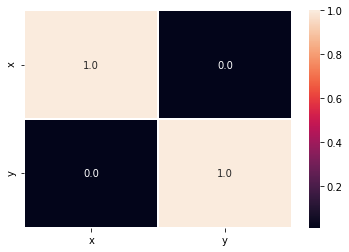

In [23]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d1z,
         'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("First Derivative z")
    plt.ylabel("COPZ")
    plt.title("Correlation between COPZ and First Derivative z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d1z,COPZmatrix)
    print(r)
    plt.figure()
    data={'x':d1z,
          'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

# Correlation between COPZ and Second Derivative z

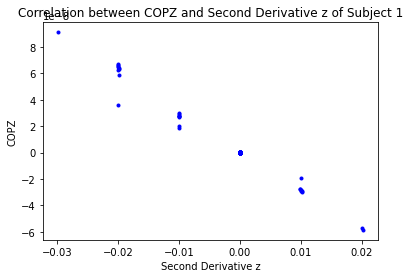

[[ 1. nan]
 [nan nan]]


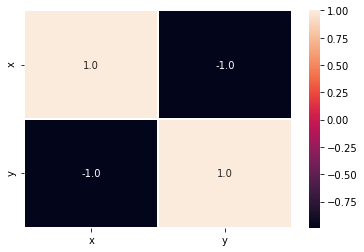

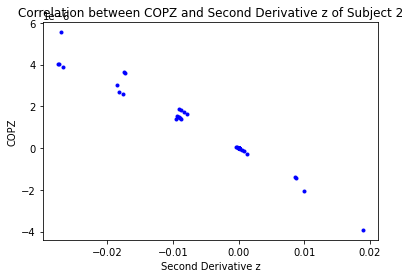

[[ 1. nan]
 [nan nan]]


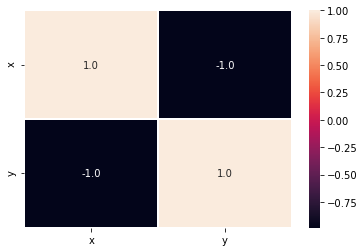

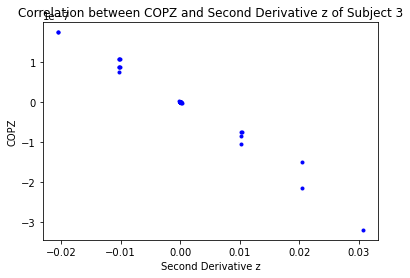

[[ 1. nan]
 [nan nan]]


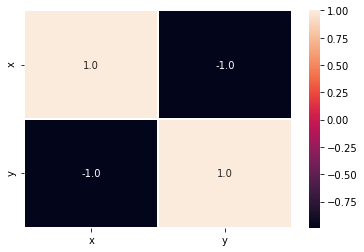

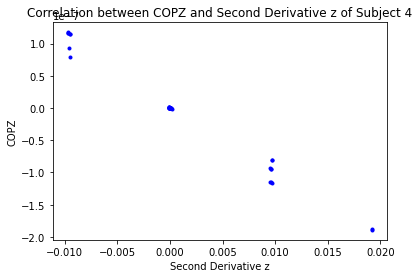

[[ 1. nan]
 [nan nan]]


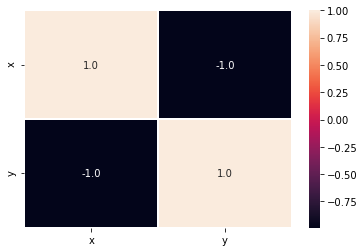

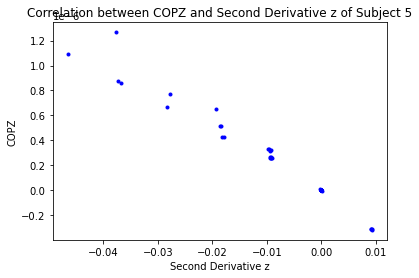

[[ 1. nan]
 [nan nan]]


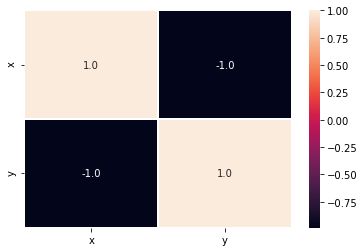

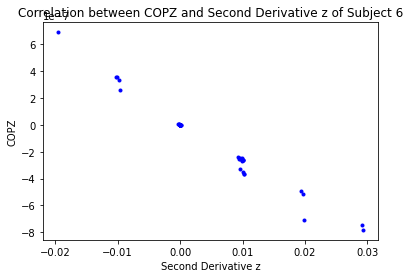

[[ 1. nan]
 [nan nan]]


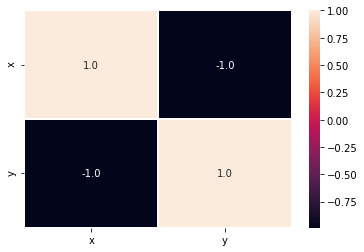

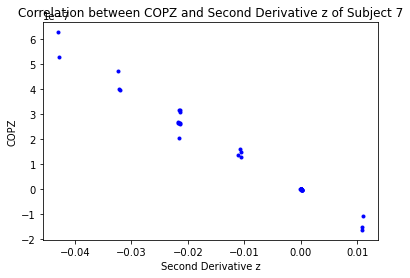

[[ 1. nan]
 [nan nan]]


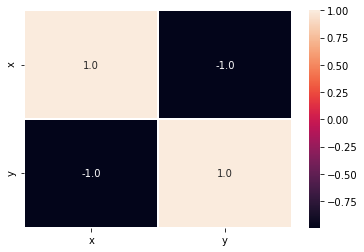

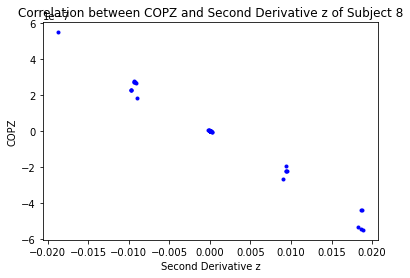

[[ 1. nan]
 [nan nan]]


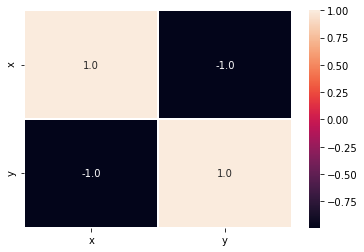

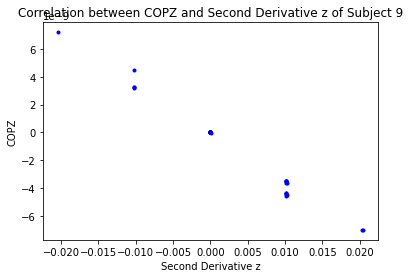

[[ 1. nan]
 [nan nan]]


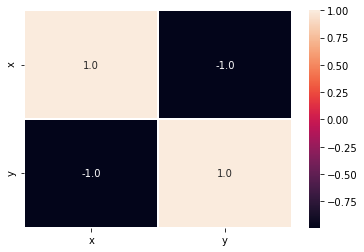

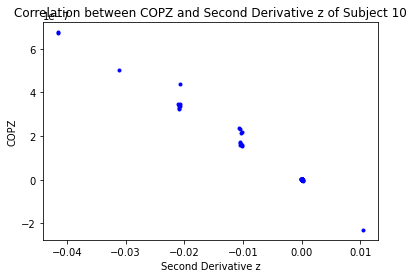

[[ 1. nan]
 [nan nan]]


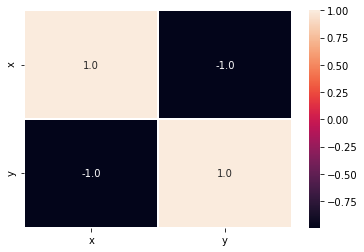

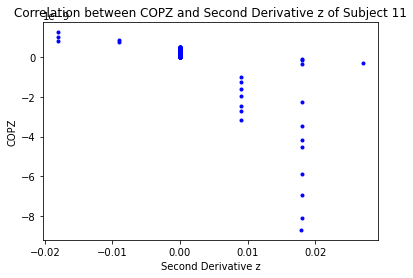

[[ 1. nan]
 [nan nan]]


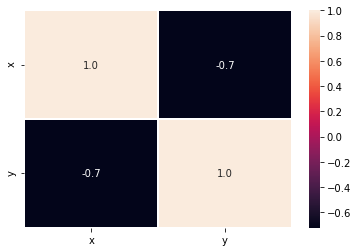

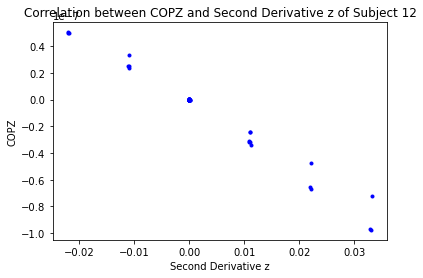

[[ 1. nan]
 [nan nan]]


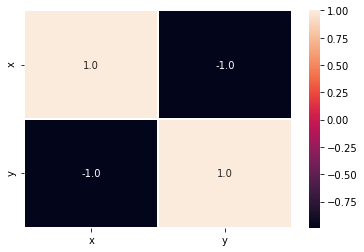

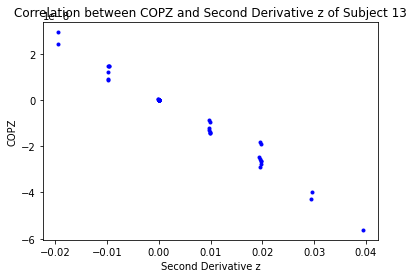

[[ 1. nan]
 [nan nan]]


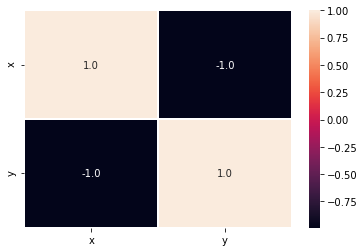

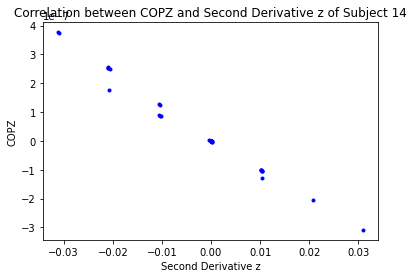

[[ 1. nan]
 [nan nan]]


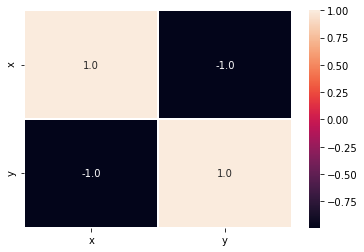

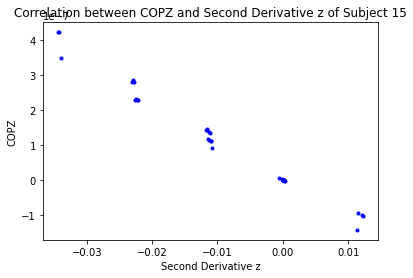

[[ 1. nan]
 [nan nan]]


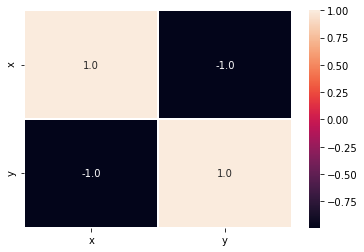

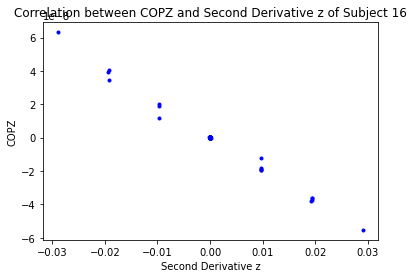

[[ 1. nan]
 [nan nan]]


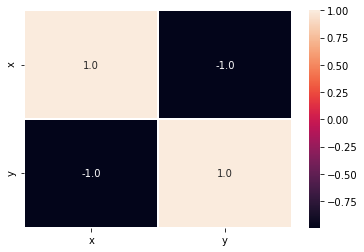

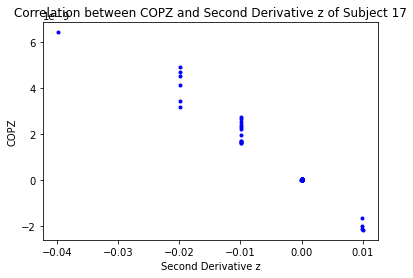

[[ 1. nan]
 [nan nan]]


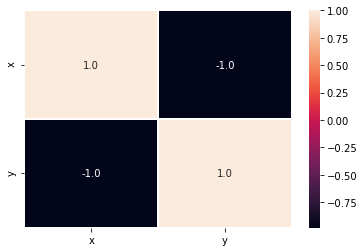

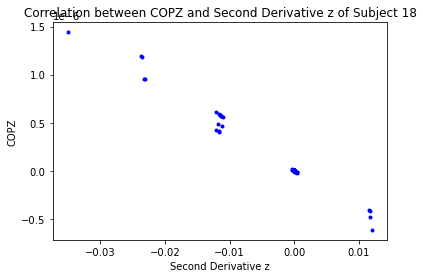

[[ 1. nan]
 [nan nan]]


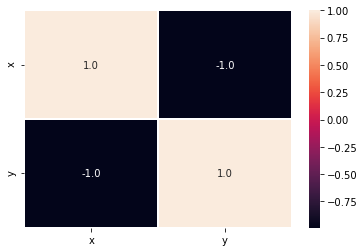

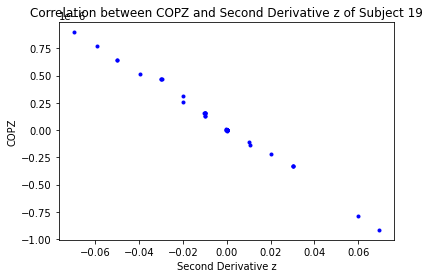

[[ 1. nan]
 [nan nan]]


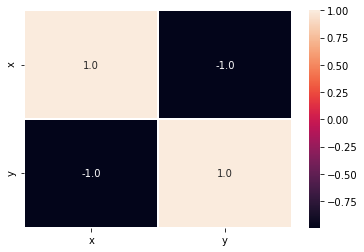

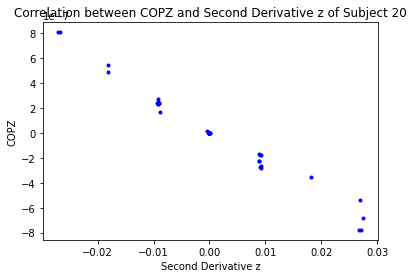

[[ 1. nan]
 [nan nan]]


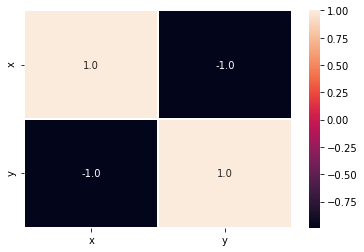

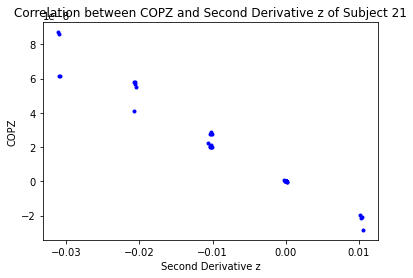

[[ 1. nan]
 [nan nan]]


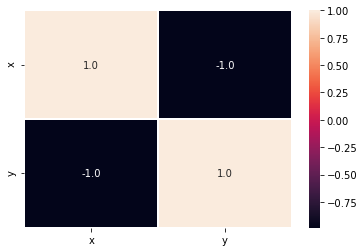

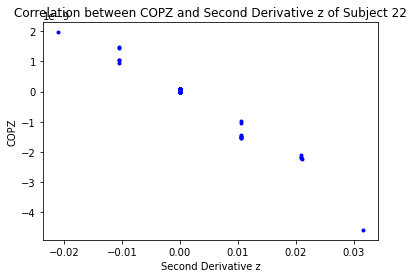

[[ 1. nan]
 [nan nan]]


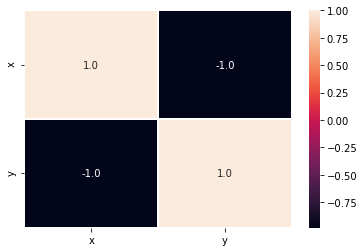

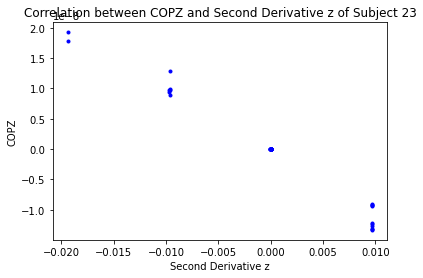

[[ 1. nan]
 [nan nan]]


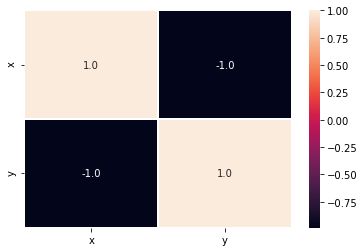

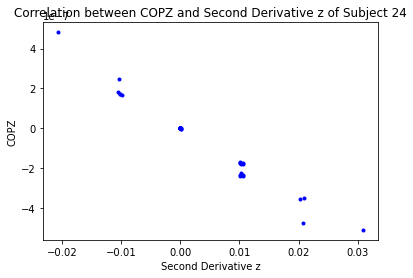

[[ 1. nan]
 [nan nan]]


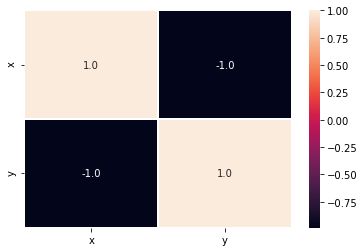

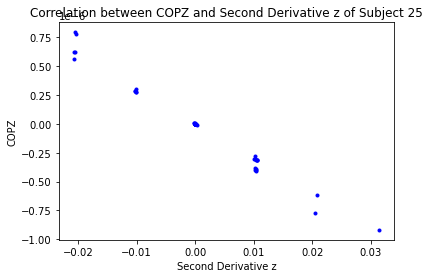

[[ 1. nan]
 [nan nan]]


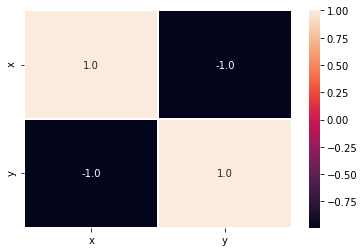

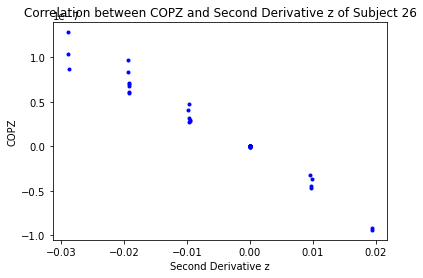

[[ 1. nan]
 [nan nan]]


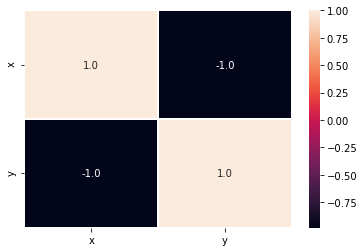

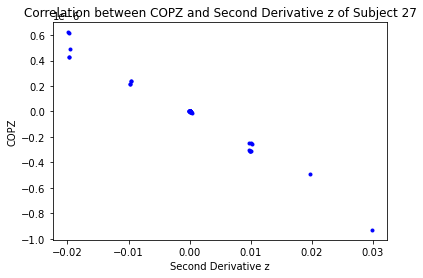

[[ 1. nan]
 [nan nan]]


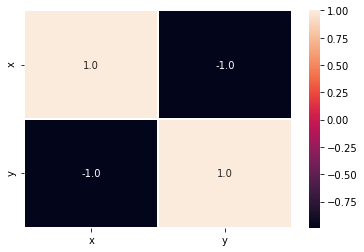

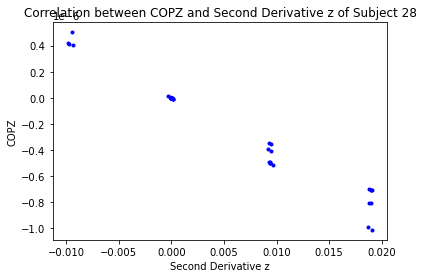

[[ 1. nan]
 [nan nan]]


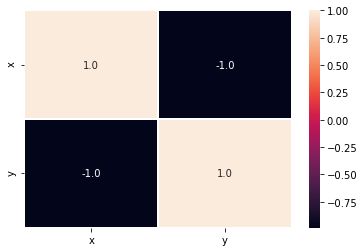

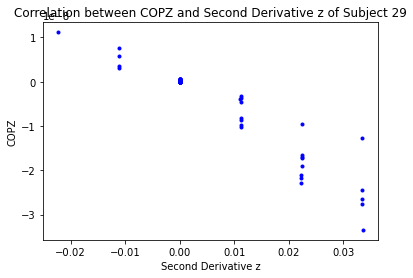

[[ 1. nan]
 [nan nan]]


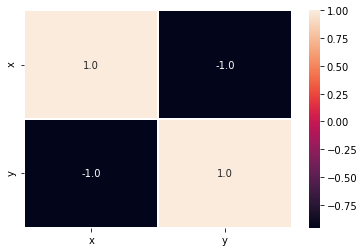

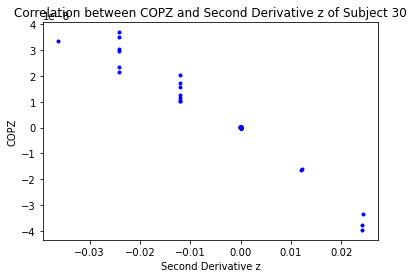

[[ 1. nan]
 [nan nan]]


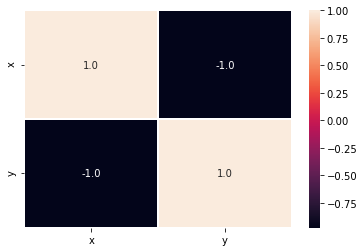

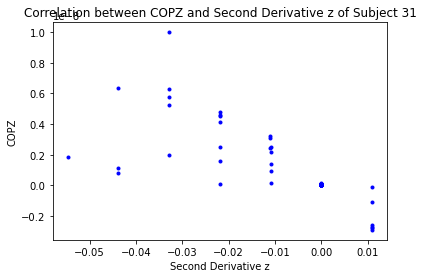

[[ 1. nan]
 [nan nan]]


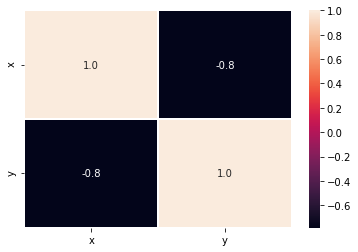

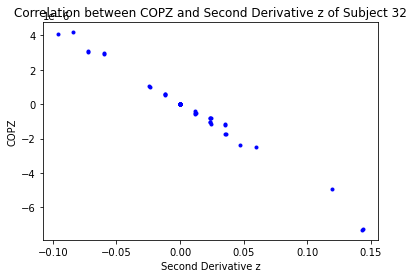

[[ 1. nan]
 [nan nan]]


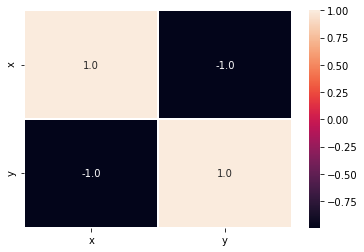

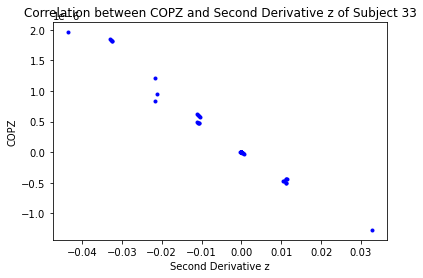

[[ 1. nan]
 [nan nan]]


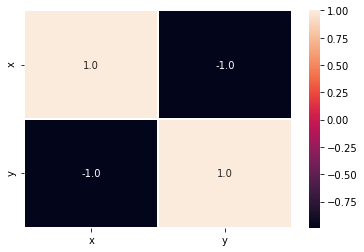

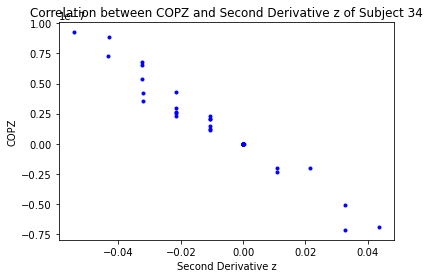

[[ 1. nan]
 [nan nan]]


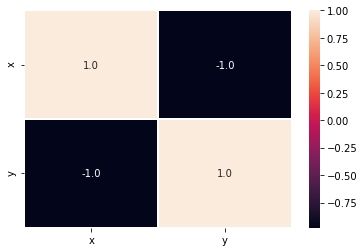

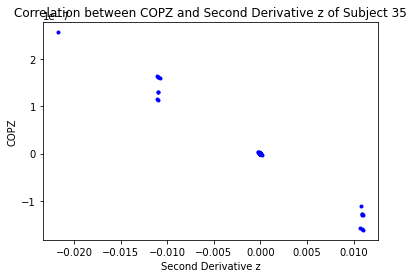

[[ 1. nan]
 [nan nan]]


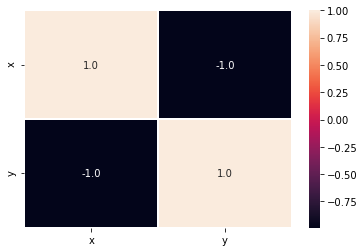

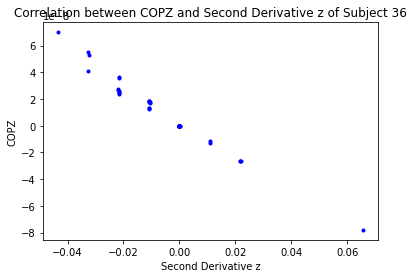

[[ 1. nan]
 [nan nan]]


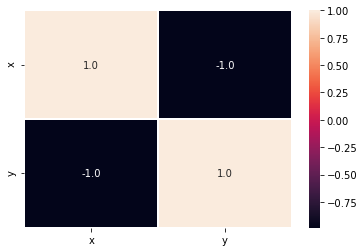

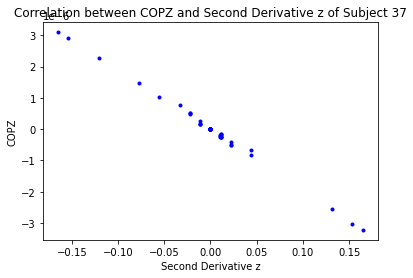

[[ 1. nan]
 [nan nan]]


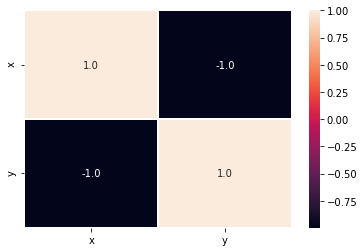

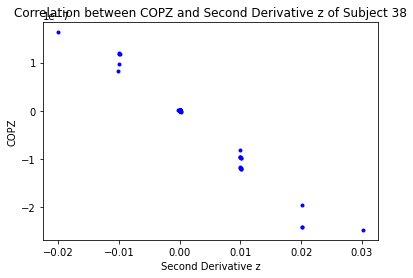

[[ 1. nan]
 [nan nan]]


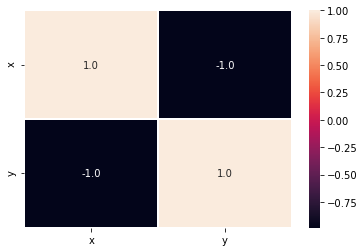

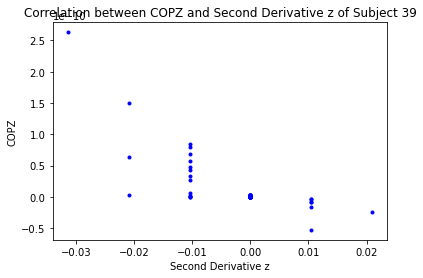

[[ 1. nan]
 [nan nan]]


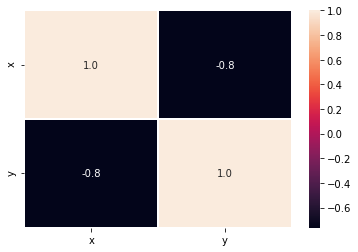

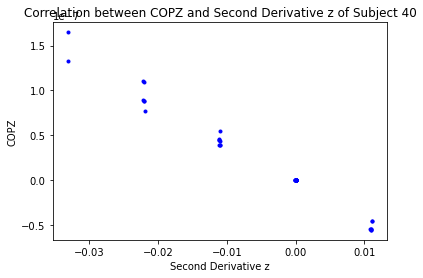

[[ 1. nan]
 [nan nan]]


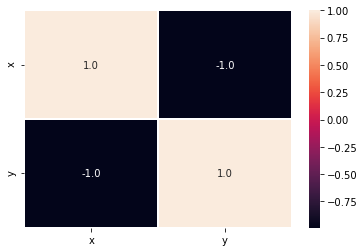

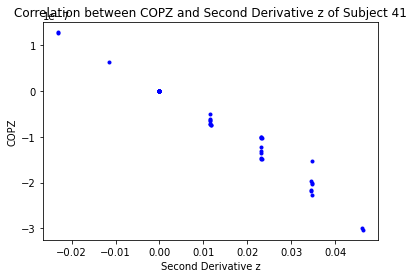

[[ 1. nan]
 [nan nan]]


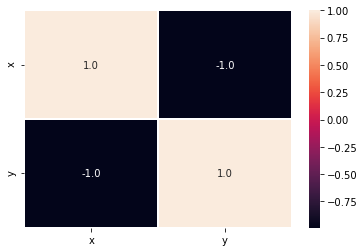

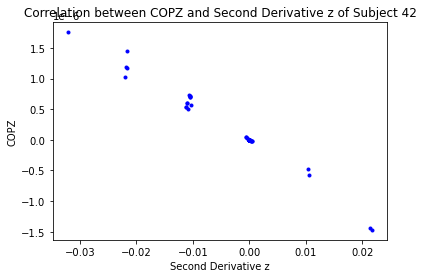

[[ 1. nan]
 [nan nan]]


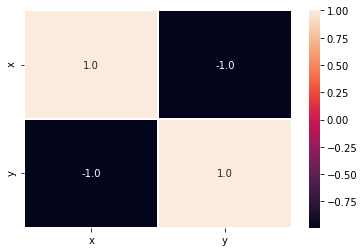

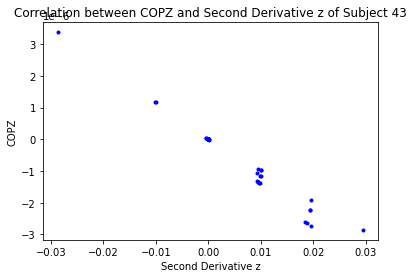

[[ 1. nan]
 [nan nan]]


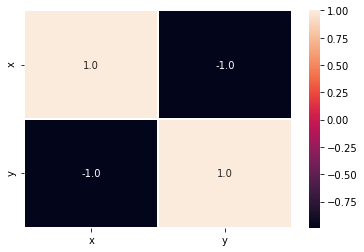

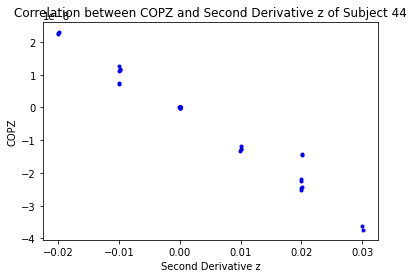

[[ 1. nan]
 [nan nan]]


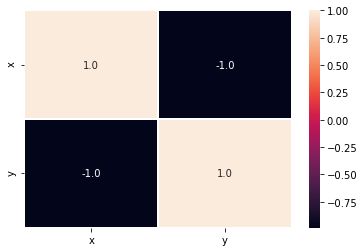

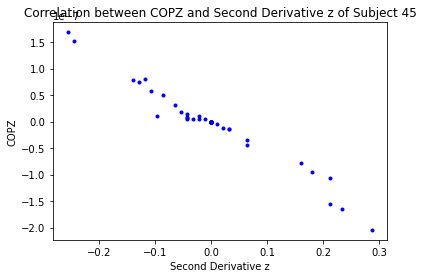

[[ 1. nan]
 [nan nan]]


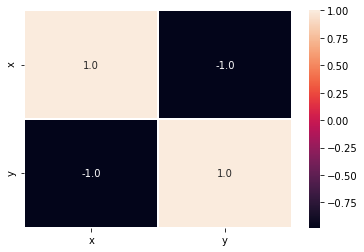

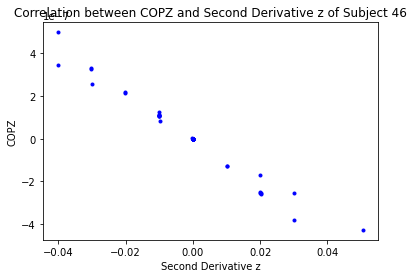

[[ 1. nan]
 [nan nan]]


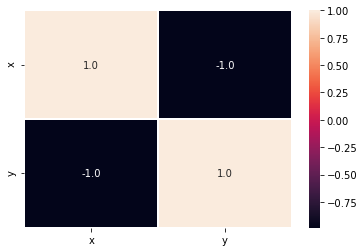

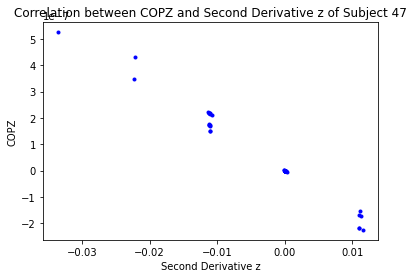

[[ 1. nan]
 [nan nan]]


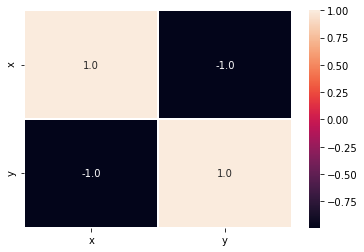

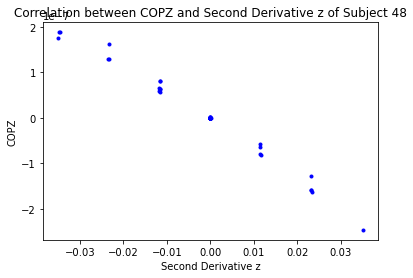

[[ 1. nan]
 [nan nan]]


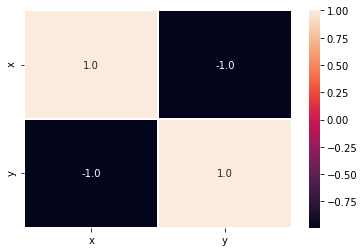

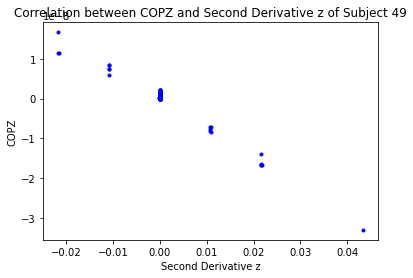

[[ 1. nan]
 [nan nan]]


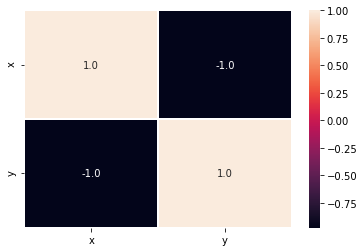

In [24]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    mass=PDSinfo['Mass']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    sinx=np.sin(angulox)
    sinz=np.sin(anguloz)
    cosx=np.sin(angulox)
    cosz=np.sin(anguloz)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    Jb=(4/3)*(mass[30:])*((d[30:])**2)
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=((d[30:])*(sinx[30:])*Jb*(1/((mass[s])*9.8)))*((sinx[30:])*((d1x)**2)-(cosx[30:])*(d2x))
    COPZ=((d[30:])*(sinz[30:])*Jb*(1/((mass[s])*9.8)))*((sinz[30:])*((d1z)**2)-(cosz[30:])*(d2z))
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2z,
         'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative z")
    plt.ylabel("COPZ")
    plt.title("Correlation between COPZ and Second Derivative z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2z,COPZmatrix)
    print(r)
    plt.figure()
    data={'x':d2z,
          'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()